In [1]:
%load_ext autoreload
%autoreload 2

from nnTrain import train_efn, train_pfn, get_data, get_data_softDrop
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Process
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow import keras
from keras import backend as K
from energyflow.utils import data_split, to_categorical
from sklearn.model_selection import train_test_split
import gc
from tensorflow.keras.losses import BinaryCrossentropy

# define rng seeds for train/test/val split for replicable results
rng1 = 45446
rng2 = 25135

2024-02-13 17:14:33.402621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import energyflow as ef
ef.__file__

'/home/sbrightt/.local/lib/python3.9/site-packages/energyflow/__init__.py'

# Hadron Level

In [2]:
base="/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/"
nmax = 200000

hdata = get_data('q',hlevel=True,efrac=True,base=base,nmax=nmax,wta=True)
htrain, htest = train_test_split(hdata,train_size=0.5,random_state=rng1)
htest, hval = train_test_split(htest,train_size=0.5,random_state=rng2)

pdata = get_data('g',hlevel=True,efrac=True,base=base,nmax=nmax,wta=True)
ptrain, ptest = train_test_split(pdata,train_size=0.5,random_state=rng1)
ptest, pval = train_test_split(ptest,train_size=0.5,random_state=rng2)

train = np.concatenate((htrain,ptrain),axis=0)
train_labels = np.concatenate((np.ones((htrain.shape[0],1)),np.zeros((ptrain.shape[0],1))),axis=0)
perm = np.random.permutation(train.shape[0])
train = train[perm]
train_labels = train_labels[perm]

test = np.concatenate((htest,ptest),axis=0)
test_labels = np.concatenate((np.ones((htest.shape[0],1)),np.zeros((ptest.shape[0],1))),axis=0)
perm = np.random.permutation(test.shape[0])
test = test[perm]
test_labels = test_labels[perm]

val = np.concatenate((hval,pval),axis=0)
val_labels = np.concatenate((np.ones((hval.shape[0],1)),np.zeros((pval.shape[0],1))),axis=0)
perm = np.random.permutation(val.shape[0])
val = val[perm]
val_labels = val_labels[perm]

del hdata, pdata, htrain, htest, hval, ptrain, ptest, pval, perm

Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set4_R1.0_mH1000_pTall_WTA.h5
Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    601         ['phats_input[0][0]']            
                                                                                                  
 activation_42 (Activation)     (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    20201       ['activation_42[0][0]']          
                                                                                            

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 134ms/step - loss: 0.6837 - acc: 0.5000 - val_loss: 0.6672 - val_acc: 0.5000
Epoch 2/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6601 - acc: 0.5000 - val_loss: 0.6536 - val_acc: 0.5000
Epoch 3/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6462 - acc: 0.5004 - val_loss: 0.6335 - val_acc: 0.5000
Epoch 4/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6195 - acc: 0.6439 - val_loss: 0.6039 - val_acc: 0.6757
Epoch 5/200
20/20 [==============================] - 2s 111ms/step - loss: 0.5989 - acc: 0.6778 - val_loss: 0.5924 - val_acc: 0.6789
Epoch 6/200
20/20 [==============================] - 2s 112ms/step - loss: 0.5897 - acc: 0.6817 - val_loss: 0.5837 - val_acc: 0.6817
Epoch 7/200
20/20 [==============================] - 2s 113ms/step - loss: 0.5824 - acc: 0.6849 - val_loss: 0.5778 - val_acc: 0.6826
Epoch 8/200
20/20 [==============================] - 2s 111ms/step - 

3328

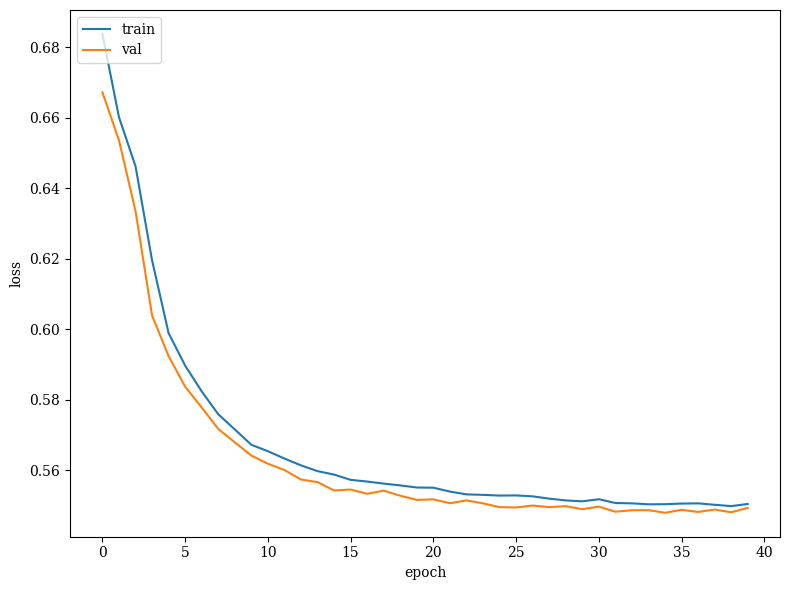

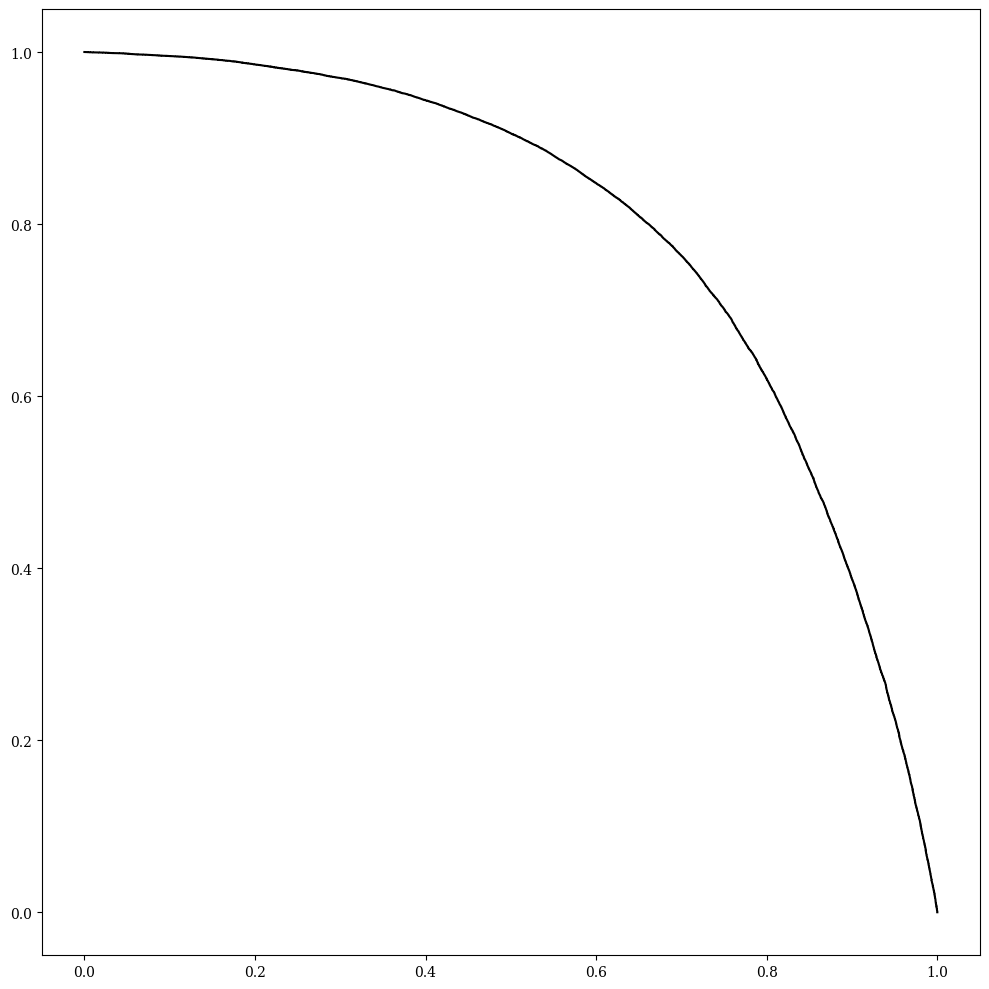

In [9]:
# spectral EFN
L = 200.0
loss = BinaryCrossentropy(from_logits=True)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(100,100,128), "F_sizes":(100,100,100),
                "F_acts":"relu","Phi_acts":"relu",
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,
                "output_act":"linear",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = True
model_kwargs['lip_const'] = float(L)
model_kwargs['eps_bjorck'] = None
model_kwargs['bound_only'] = True
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
#efn.save(f"keras_models_wta_quarkGluon/spectralEFN_L{int(L)}_zpT_hadlevel.keras")
del efn
gc.collect()

2024-02-13 16:50:27.804479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 16:50:27.839611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 16:50:27.839905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 16:50:27.840747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    601         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    20201       ['activation[0][0]']             
                                                                                              

2024-02-13 16:50:29.957116: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 1/200
20/20 [==============================] - 4s 154ms/step - loss: 0.6926 - acc: 0.5616 - val_loss: 0.6915 - val_acc: 0.6614
Epoch 2/200
20/20 [==============================] - 2s 121ms/step - loss: 0.6878 - acc: 0.6482 - val_loss: 0.6837 - val_acc: 0.6574
Epoch 3/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6810 - acc: 0.6454 - val_loss: 0.6798 - val_acc: 0.6352
Epoch 4/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6789 - acc: 0.6396 - val_loss: 0.6783 - val_acc: 0.6154
Epoch 5/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6781 - acc: 0.6328 - val_loss: 0.6775 - val_acc: 0.6363
Epoch 6/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6776 - acc: 0.6352 - val_loss: 0.6775 - val_acc: 0.6553
Epoch 7/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6776 - acc: 0.6326 - val_loss: 0.6781 - val_acc: 0.6379
Epoch 8/200
20/20 [==============================] - 2s 111ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 135ms/step - loss: 0.6924 - acc: 0.5034 - val_loss: 0.6908 - val_acc: 0.6650
Epoch 2/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6858 - acc: 0.6455 - val_loss: 0.6800 - val_acc: 0.6702
Epoch 3/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6766 - acc: 0.6690 - val_loss: 0.6740 - val_acc: 0.6661
Epoch 4/200
20/20 [==============================] - 2s 110ms/step - loss: 0.6731 - acc: 0.6569 - val_loss: 0.6729 - val_acc: 0.6506
Epoch 5/200
20/20 [==============================] - 2s 109ms/step - loss: 0.6720 - acc: 0.6432 - val_loss: 0.6708 - val_acc: 0.6367
Epoch 6/200
20/20 [==============================] - 2s 109ms/step - loss: 0.6715 - acc: 0.6350 - val_loss: 0.6705 - val_acc: 0.6455
Epoch 7/200
20/20 [==============================] - 2s 109ms/step - loss: 0.6709 - acc: 0.6349 - val_loss: 0.6707 - val_acc: 0.6361
Epoch 8/200
20/20 [==============================] - 2s 113ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 137ms/step - loss: 0.6924 - acc: 0.5331 - val_loss: 0.6908 - val_acc: 0.6612
Epoch 2/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6852 - acc: 0.6667 - val_loss: 0.6781 - val_acc: 0.6717
Epoch 3/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6731 - acc: 0.6680 - val_loss: 0.6689 - val_acc: 0.6620
Epoch 4/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6679 - acc: 0.6540 - val_loss: 0.6661 - val_acc: 0.6440
Epoch 5/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6667 - acc: 0.6379 - val_loss: 0.6667 - val_acc: 0.6379
Epoch 6/200
20/20 [==============================] - 2s 109ms/step - loss: 0.6659 - acc: 0.6374 - val_loss: 0.6648 - val_acc: 0.6356
Epoch 7/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6653 - acc: 0.6368 - val_loss: 0.6641 - val_acc: 0.6304
Epoch 8/200
20/20 [==============================] - 2s 109ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 134ms/step - loss: 0.6916 - acc: 0.5449 - val_loss: 0.6887 - val_acc: 0.6496
Epoch 2/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6803 - acc: 0.6594 - val_loss: 0.6720 - val_acc: 0.6709
Epoch 3/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6687 - acc: 0.6700 - val_loss: 0.6653 - val_acc: 0.6685
Epoch 4/200
20/20 [==============================] - 2s 109ms/step - loss: 0.6641 - acc: 0.6612 - val_loss: 0.6615 - val_acc: 0.6536
Epoch 5/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6617 - acc: 0.6453 - val_loss: 0.6600 - val_acc: 0.6472
Epoch 6/200
20/20 [==============================] - 2s 107ms/step - loss: 0.6614 - acc: 0.6362 - val_loss: 0.6601 - val_acc: 0.6413
Epoch 7/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6604 - acc: 0.6354 - val_loss: 0.6594 - val_acc: 0.6374
Epoch 8/200
20/20 [==============================] - 2s 109ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 138ms/step - loss: 0.6921 - acc: 0.5955 - val_loss: 0.6897 - val_acc: 0.6711
Epoch 2/200
20/20 [==============================] - 2s 119ms/step - loss: 0.6821 - acc: 0.6702 - val_loss: 0.6721 - val_acc: 0.6631
Epoch 3/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6661 - acc: 0.6587 - val_loss: 0.6614 - val_acc: 0.6496
Epoch 4/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6602 - acc: 0.6405 - val_loss: 0.6584 - val_acc: 0.6381
Epoch 5/200
20/20 [==============================] - 2s 111ms/step - loss: 0.6584 - acc: 0.6355 - val_loss: 0.6574 - val_acc: 0.6328
Epoch 6/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6573 - acc: 0.6351 - val_loss: 0.6556 - val_acc: 0.6367
Epoch 7/200
20/20 [==============================] - 2s 111ms/step - loss: 0.6565 - acc: 0.6354 - val_loss: 0.6560 - val_acc: 0.6363
Epoch 8/200
20/20 [==============================] - 2s 115ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 136ms/step - loss: 0.6911 - acc: 0.6088 - val_loss: 0.6870 - val_acc: 0.6722
Epoch 2/200
20/20 [==============================] - 2s 120ms/step - loss: 0.6767 - acc: 0.6680 - val_loss: 0.6657 - val_acc: 0.6719
Epoch 3/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6610 - acc: 0.6697 - val_loss: 0.6562 - val_acc: 0.6630
Epoch 4/200
20/20 [==============================] - 2s 118ms/step - loss: 0.6551 - acc: 0.6519 - val_loss: 0.6528 - val_acc: 0.6470
Epoch 5/200
20/20 [==============================] - 2s 120ms/step - loss: 0.6529 - acc: 0.6397 - val_loss: 0.6516 - val_acc: 0.6375
Epoch 6/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6524 - acc: 0.6365 - val_loss: 0.6514 - val_acc: 0.6369
Epoch 7/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6517 - acc: 0.6368 - val_loss: 0.6514 - val_acc: 0.6404
Epoch 8/200
20/20 [==============================] - 2s 113ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 135ms/step - loss: 0.6911 - acc: 0.6352 - val_loss: 0.6870 - val_acc: 0.6630
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6762 - acc: 0.6689 - val_loss: 0.6641 - val_acc: 0.6661
Epoch 3/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6583 - acc: 0.6579 - val_loss: 0.6537 - val_acc: 0.6521
Epoch 4/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6522 - acc: 0.6414 - val_loss: 0.6509 - val_acc: 0.6392
Epoch 5/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6499 - acc: 0.6387 - val_loss: 0.6486 - val_acc: 0.6386
Epoch 6/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6490 - acc: 0.6381 - val_loss: 0.6487 - val_acc: 0.6433
Epoch 7/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6486 - acc: 0.6398 - val_loss: 0.6471 - val_acc: 0.6378
Epoch 8/200
20/20 [==============================] - 2s 115ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 137ms/step - loss: 0.6899 - acc: 0.6054 - val_loss: 0.6835 - val_acc: 0.6726
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6713 - acc: 0.6721 - val_loss: 0.6594 - val_acc: 0.6686
Epoch 3/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6542 - acc: 0.6602 - val_loss: 0.6491 - val_acc: 0.6482
Epoch 4/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6478 - acc: 0.6427 - val_loss: 0.6454 - val_acc: 0.6369
Epoch 5/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6463 - acc: 0.6390 - val_loss: 0.6450 - val_acc: 0.6408
Epoch 6/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6461 - acc: 0.6391 - val_loss: 0.6446 - val_acc: 0.6478
Epoch 7/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6452 - acc: 0.6400 - val_loss: 0.6443 - val_acc: 0.6395
Epoch 8/200
20/20 [==============================] - 2s 113ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 138ms/step - loss: 0.6910 - acc: 0.5752 - val_loss: 0.6861 - val_acc: 0.6639
Epoch 2/200
20/20 [==============================] - 2s 119ms/step - loss: 0.6738 - acc: 0.6642 - val_loss: 0.6620 - val_acc: 0.6724
Epoch 3/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6575 - acc: 0.6715 - val_loss: 0.6520 - val_acc: 0.6677
Epoch 4/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6491 - acc: 0.6555 - val_loss: 0.6449 - val_acc: 0.6508
Epoch 5/200
20/20 [==============================] - 2s 111ms/step - loss: 0.6422 - acc: 0.6407 - val_loss: 0.6414 - val_acc: 0.6440
Epoch 11/200
20/20 [==============================] - 2s 110ms/step - loss: 0.6418 - acc: 0.6424 - val_loss: 0.6413 - val_acc: 0.6374
Epoch 12/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6423 - acc: 0.6406 - val_loss: 0.6422 - val_acc: 0.6393
Epoch 13/200
20/20 [==============================] - 2s 112ms/step

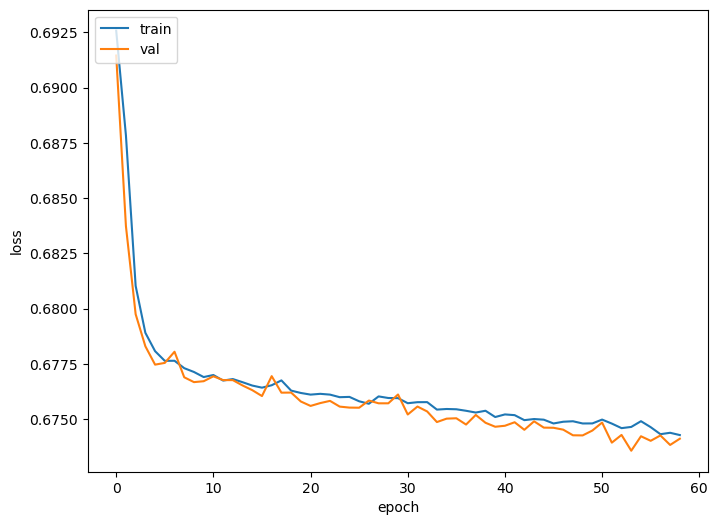

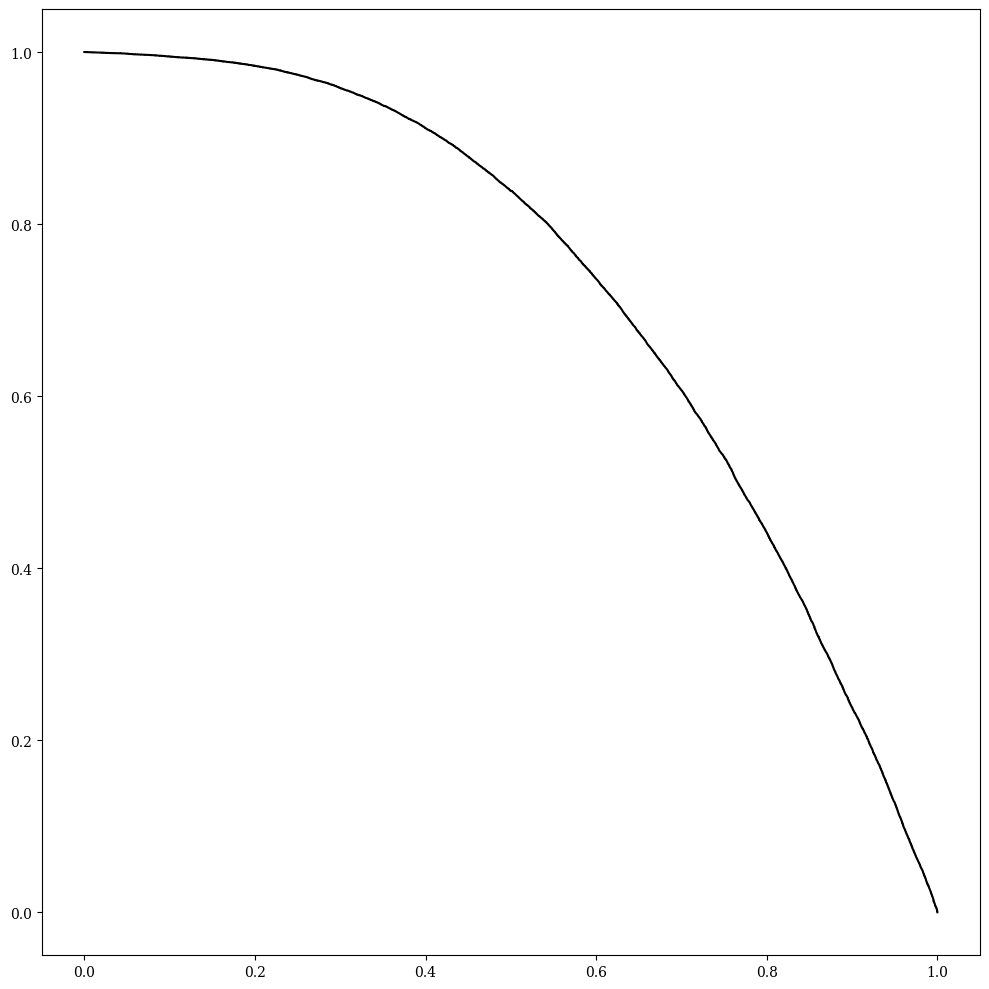

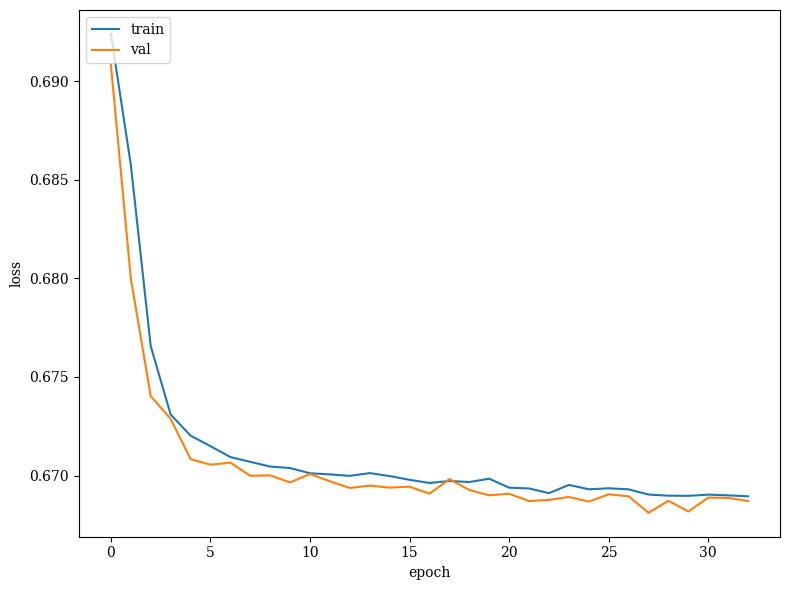

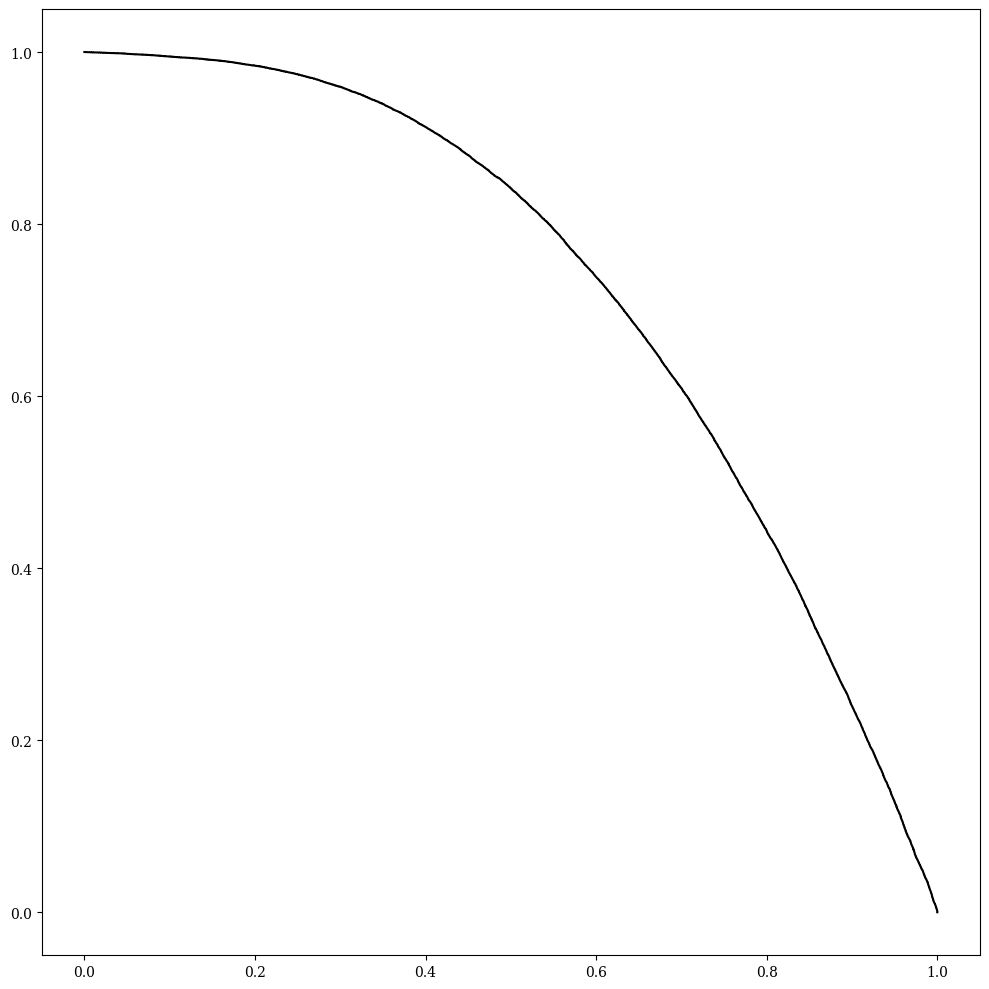

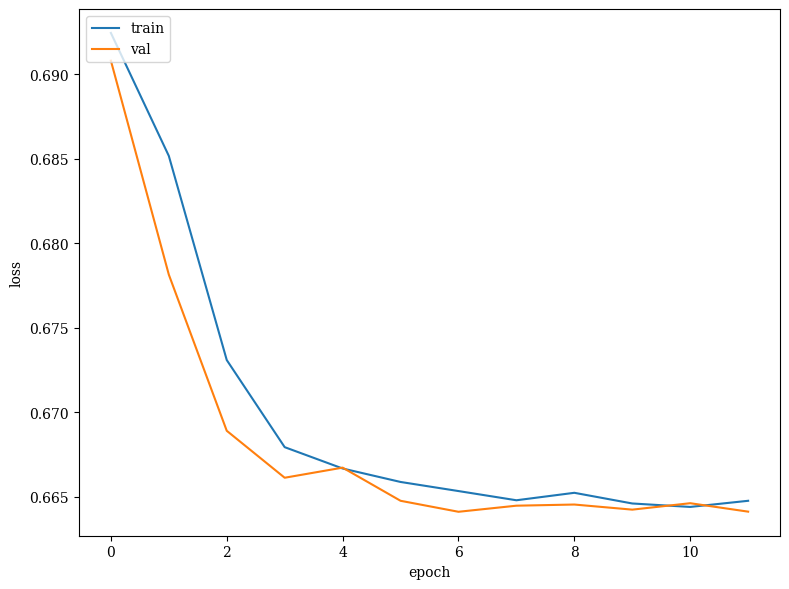

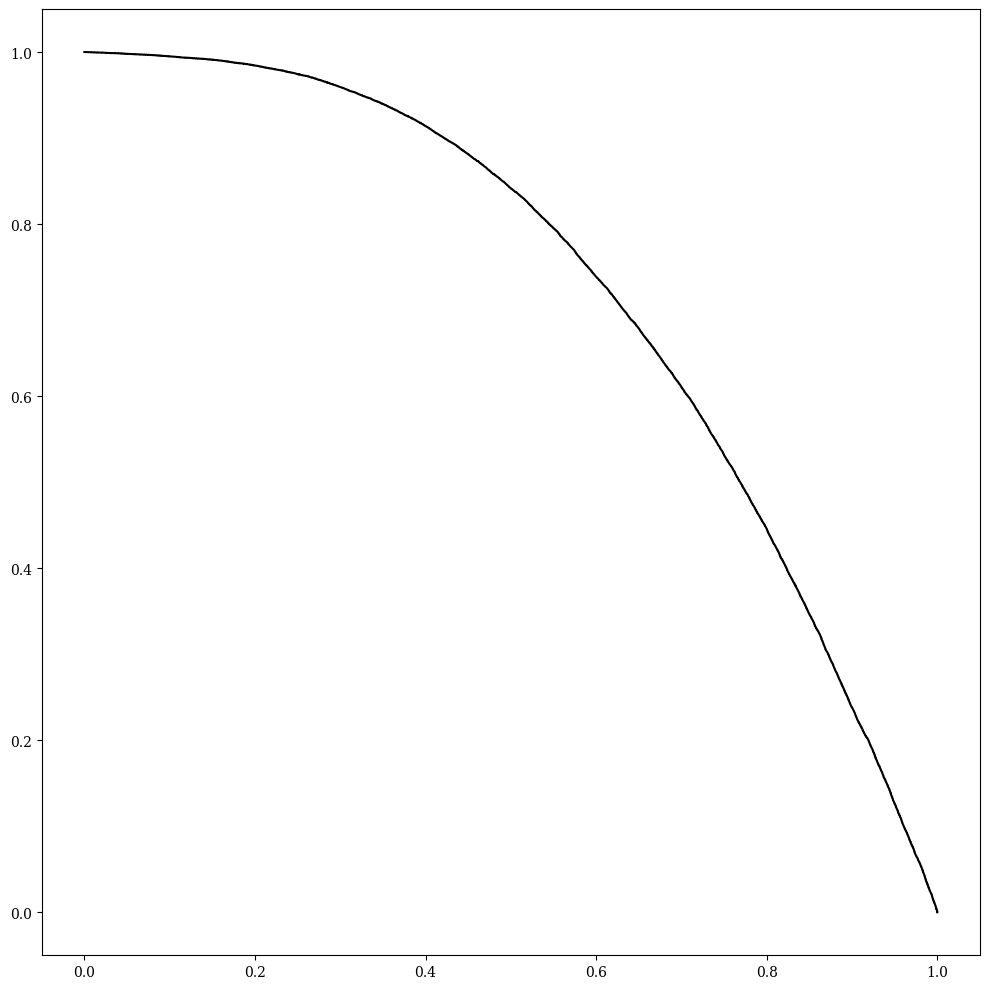

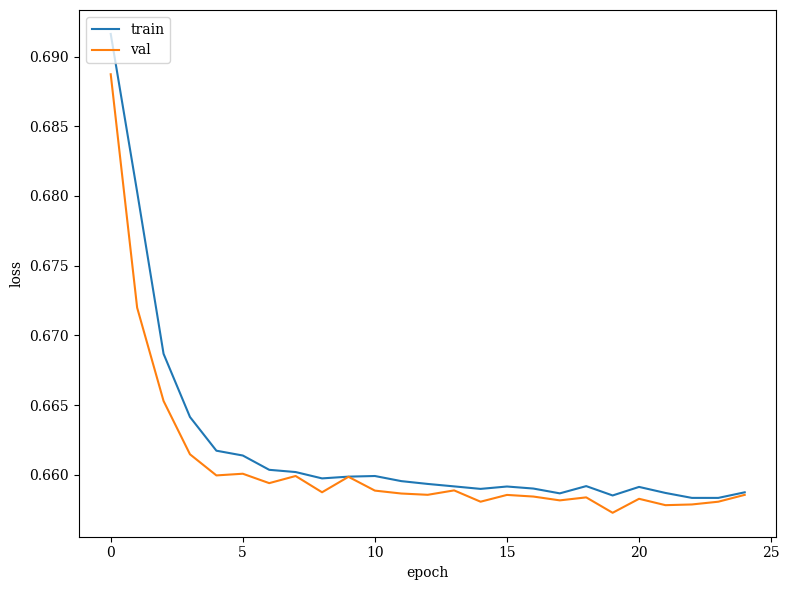

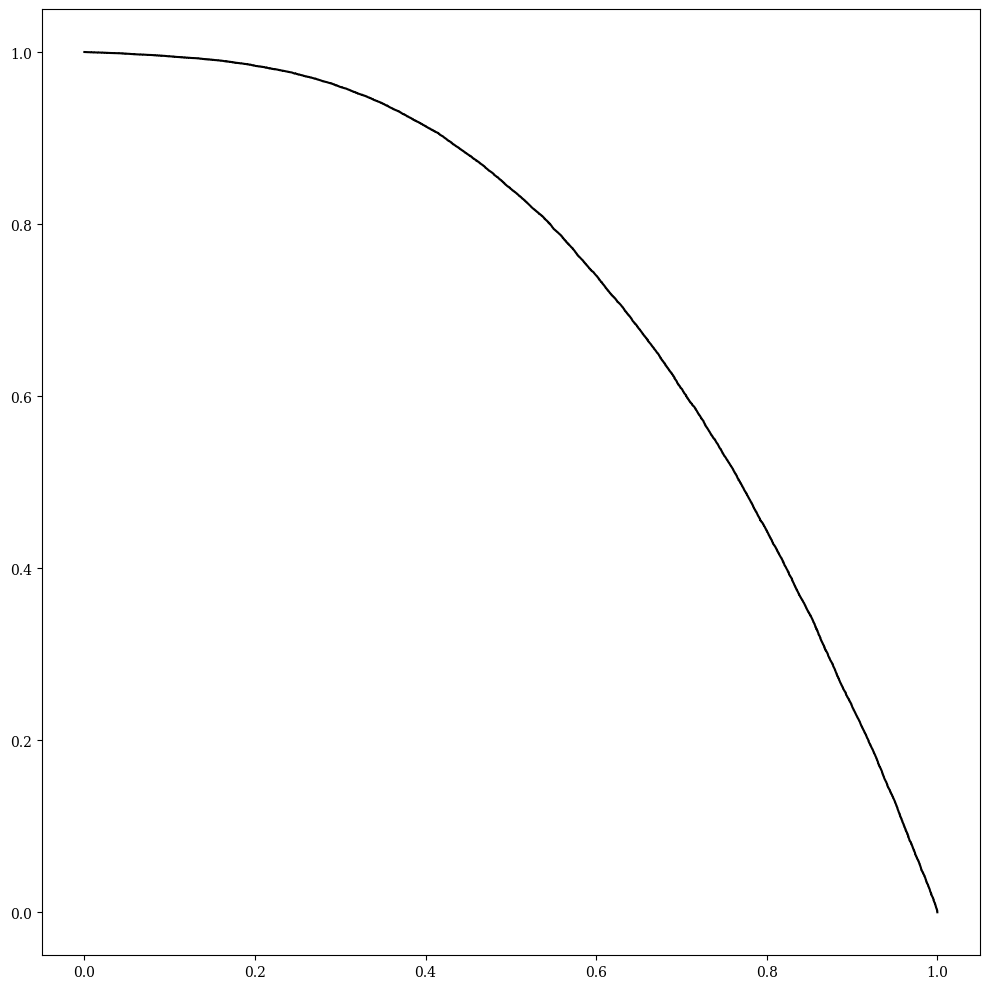

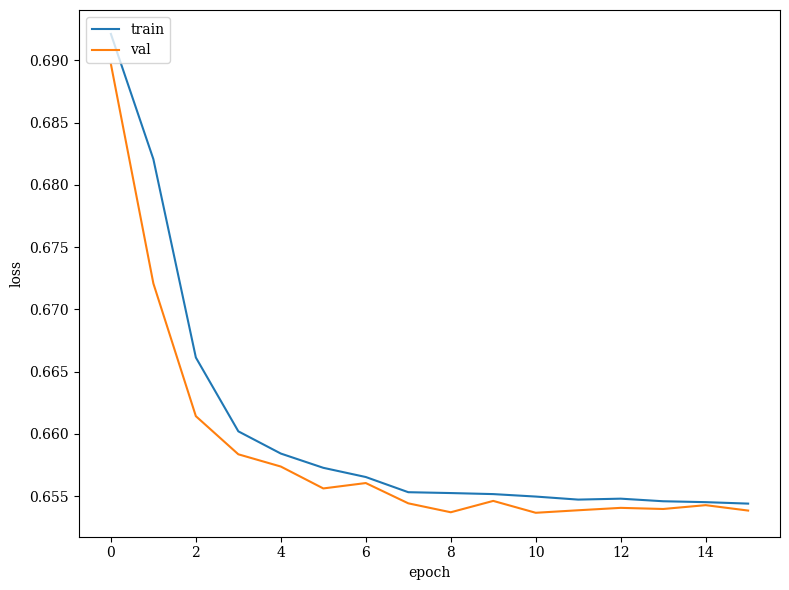

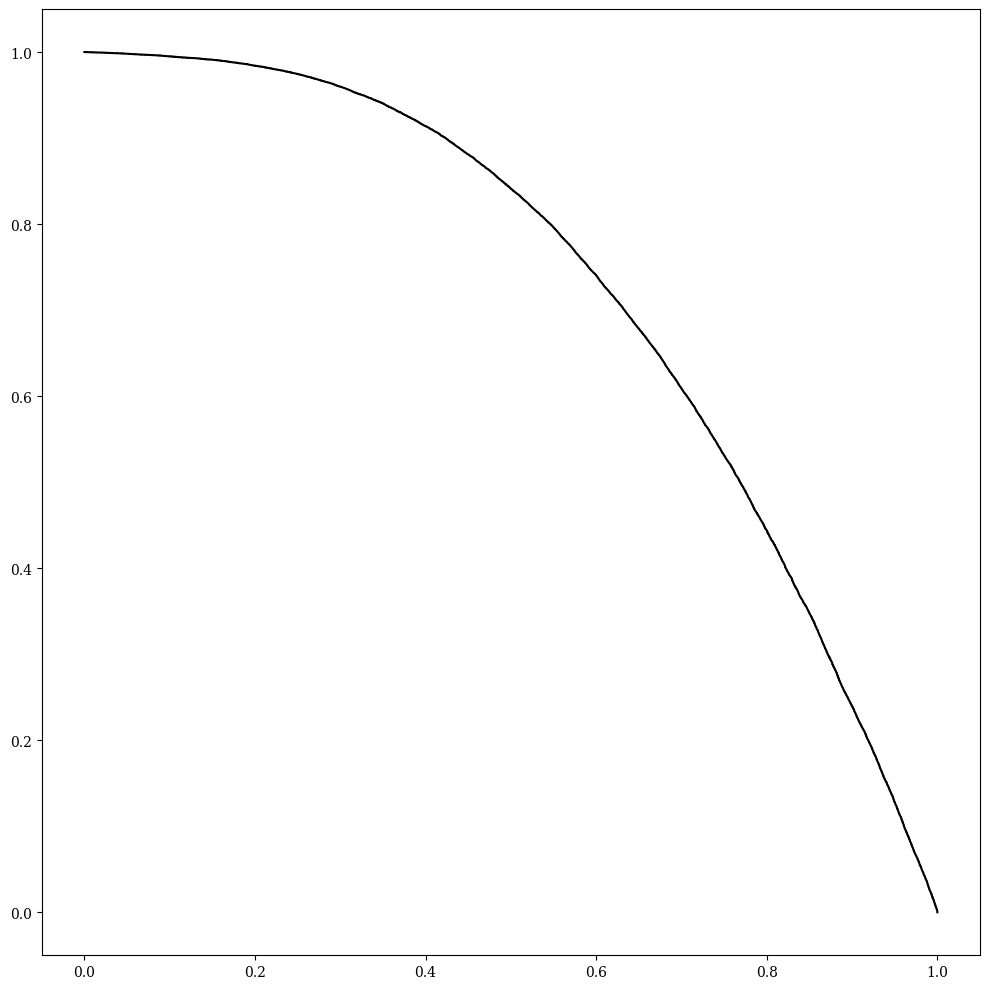

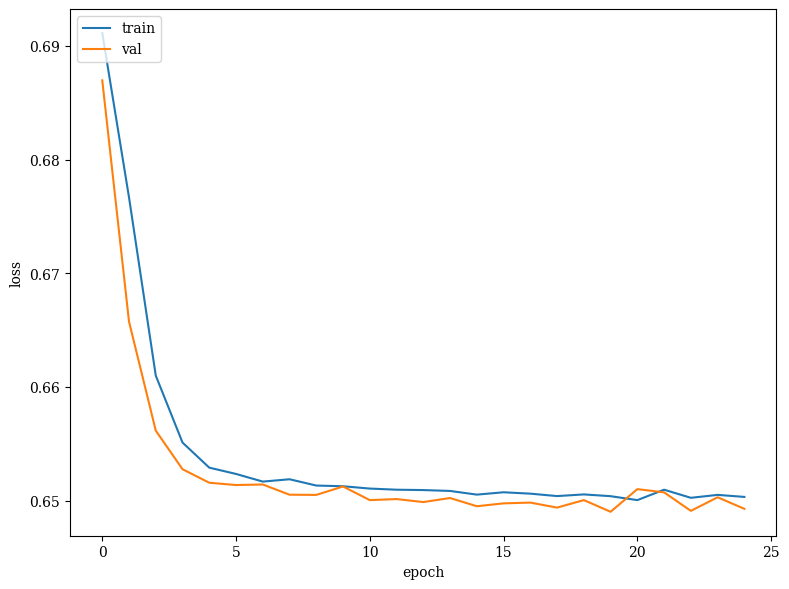

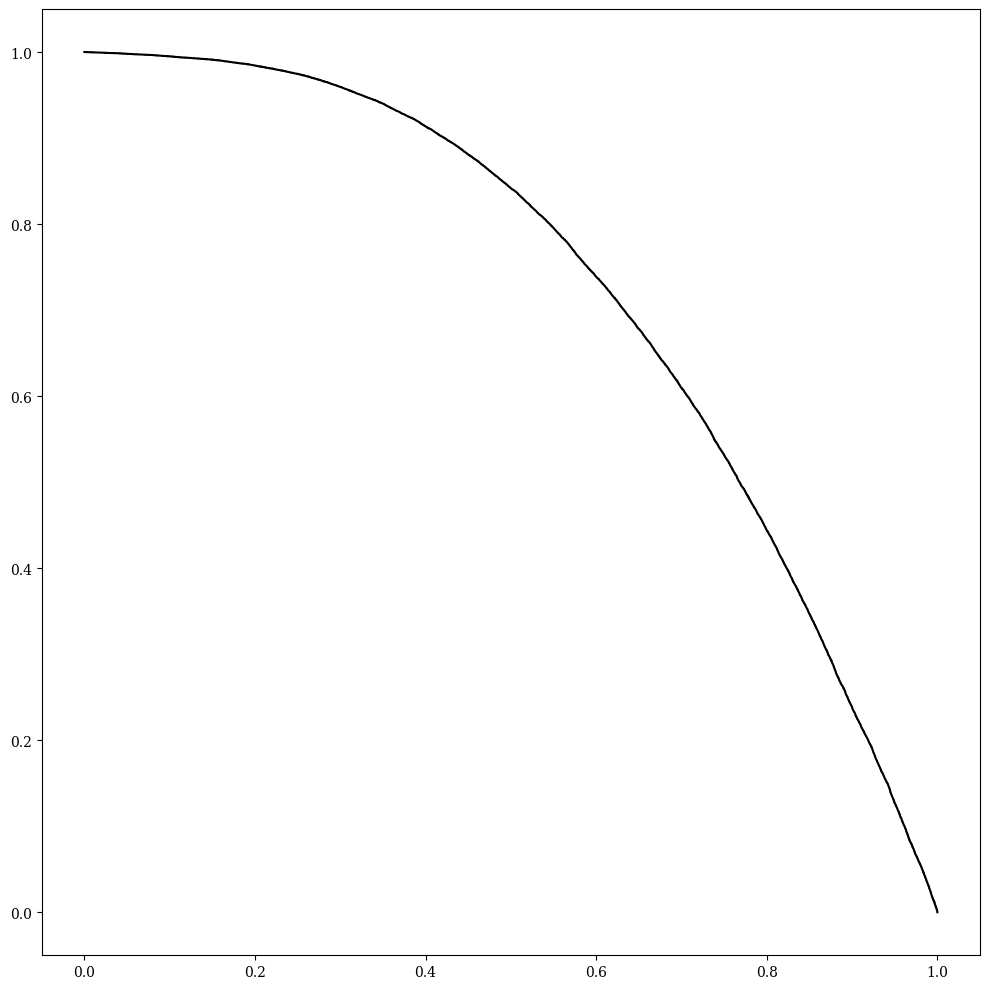

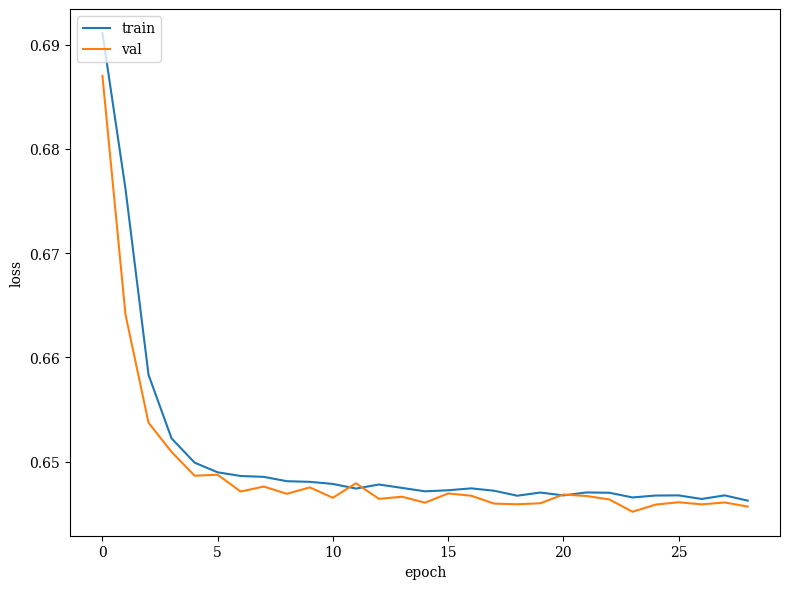

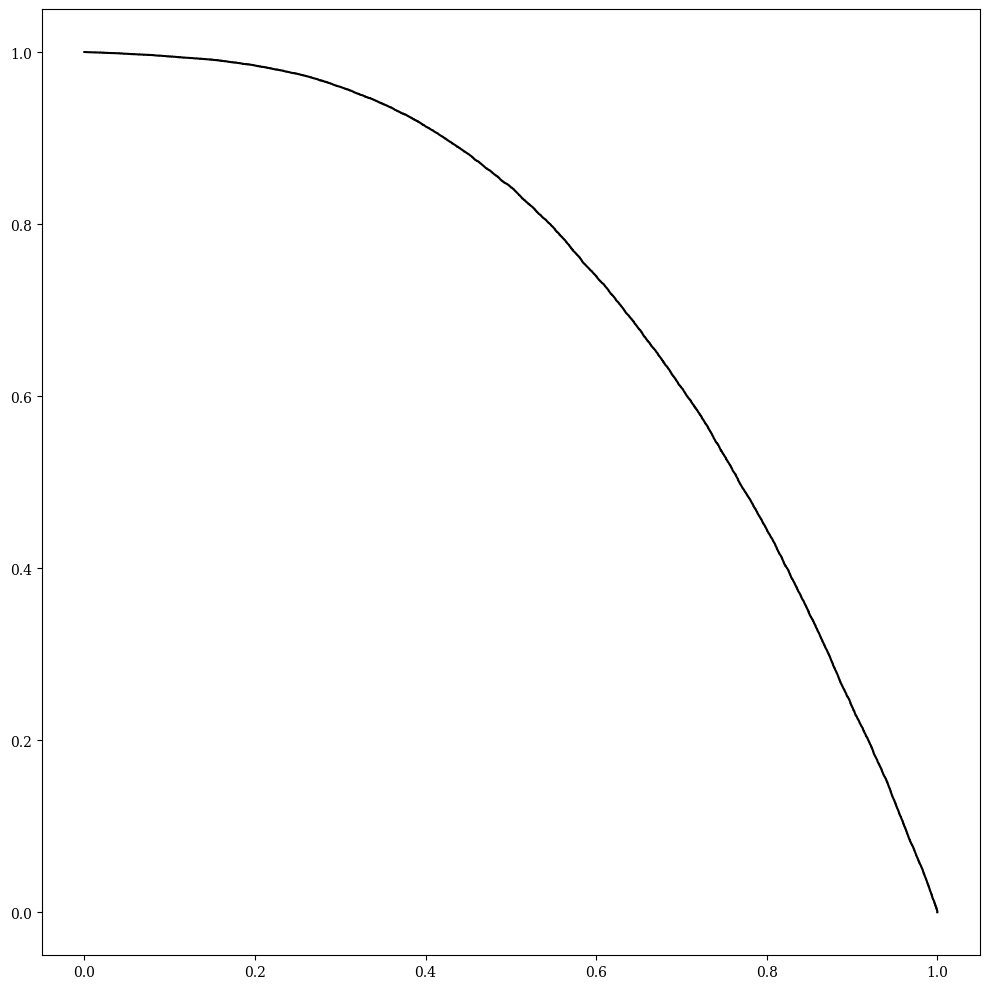

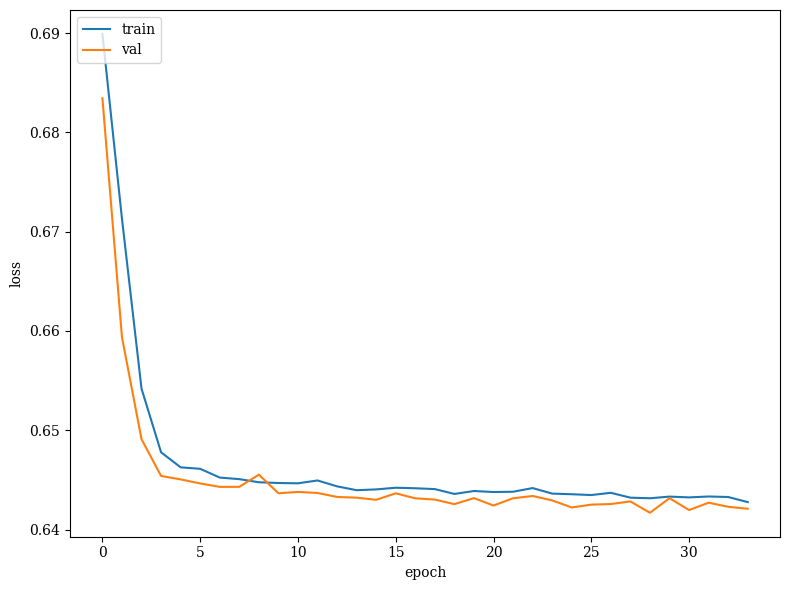

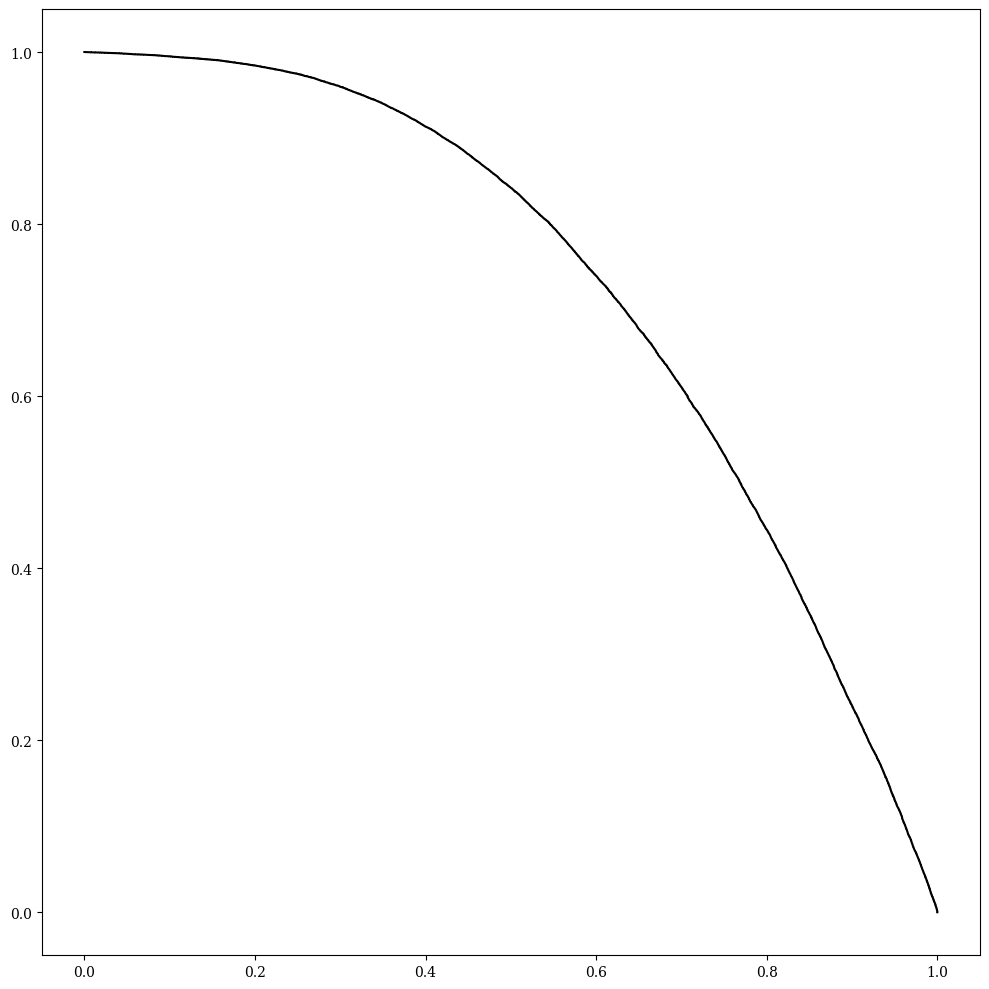

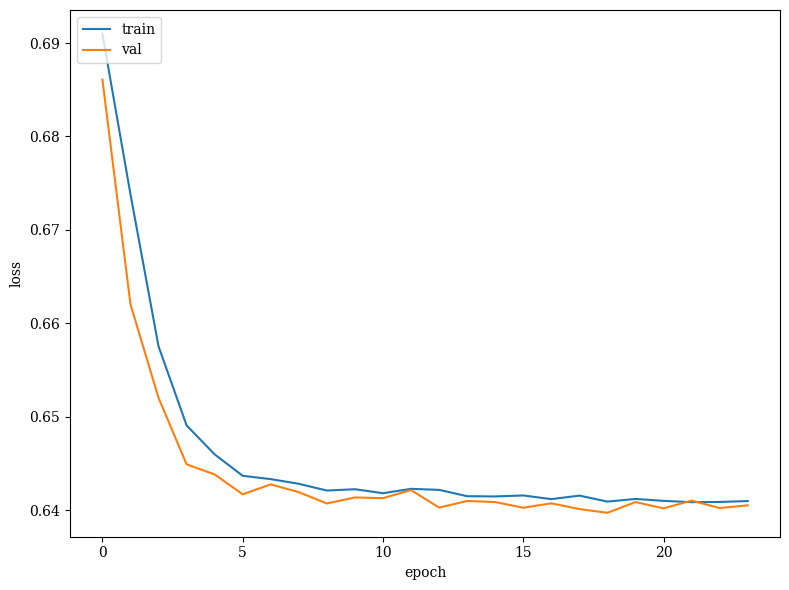

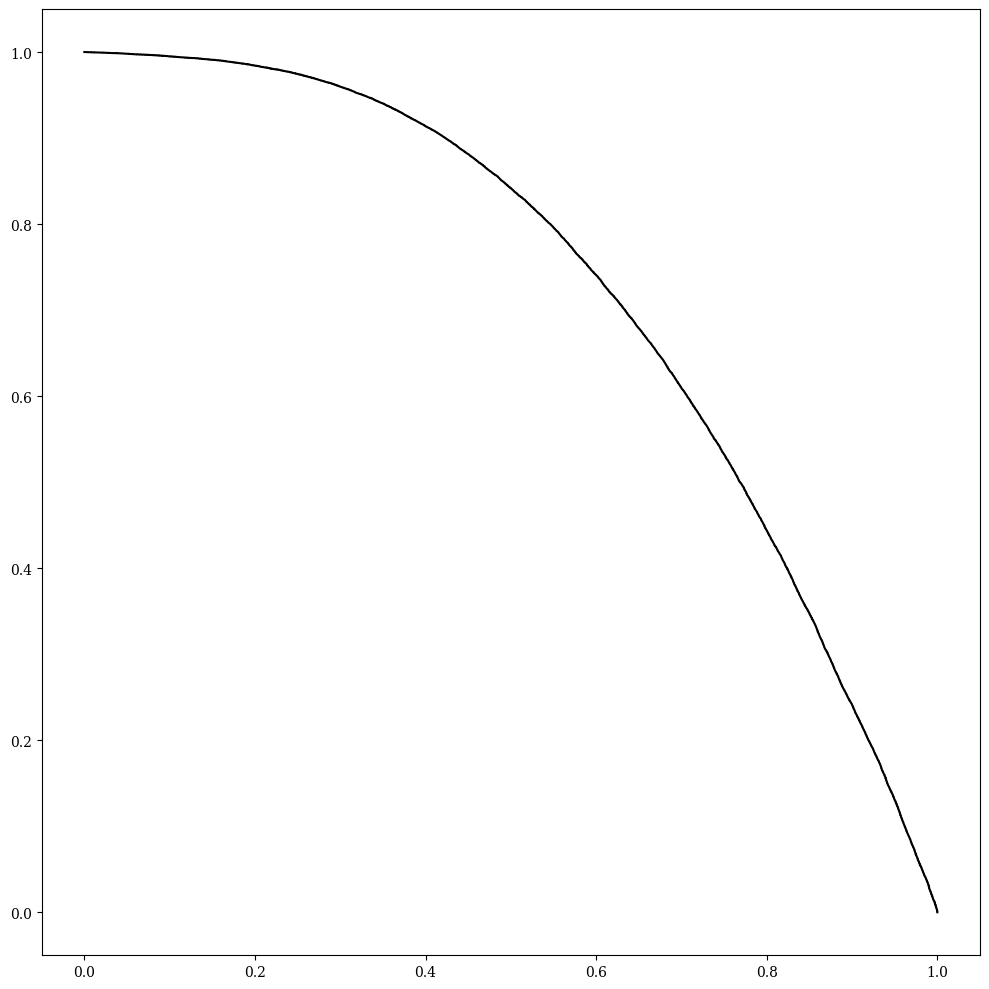

In [3]:
# spectral EFN L >= 1
#Ls = [20,30,40,50,60,70,80,90,
#      100,200,300,400,500,600,700,800,900,
#      1000,5000,10000]
#Ls = [2000,3000,4000,6000,7000,8000,9000]
Ls = [2,3,4,5,6,7,8,9,10]
#for L in range(1,11,1):
for L in Ls:
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(100,100,128), "F_sizes":(100,100,100),
                    "F_acts":"relu","Phi_acts":"relu",
                    "F_dropouts":0.1,
                    "input_dim":2,
                    "output_dim":1,
                    "output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-3),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    model_kwargs['lip_const'] = float(L)
    model_kwargs['eps_bjorck'] = None
    model_kwargs['bound_only'] = True
    train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
    efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    efn.save(f"keras_models_wta_quarkGluon/spectralEFN_L{int(L)}_zpT_hadlevel.keras")
    del efn
    gc.collect()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     180         ['phats_input[0][0]']            
                                                                                                  
 activation_70 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation_70[0][0]']          
                                                                                           

2381

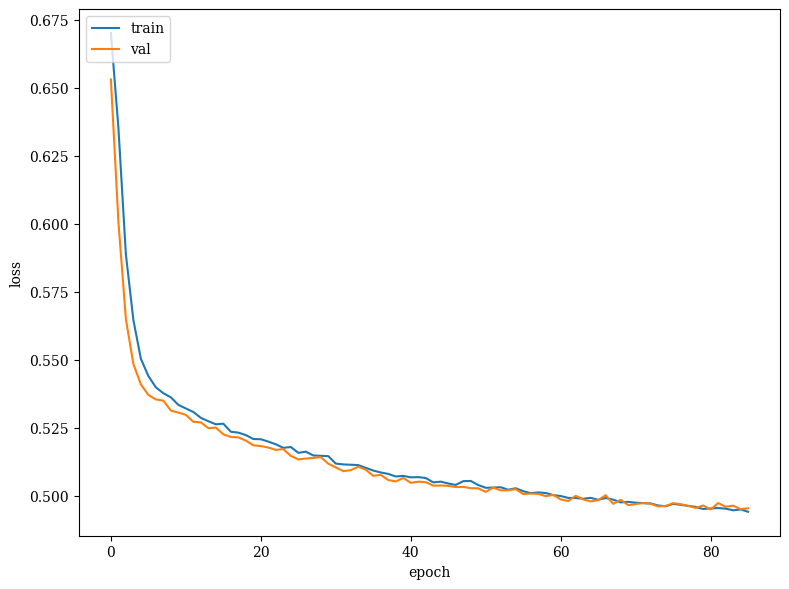

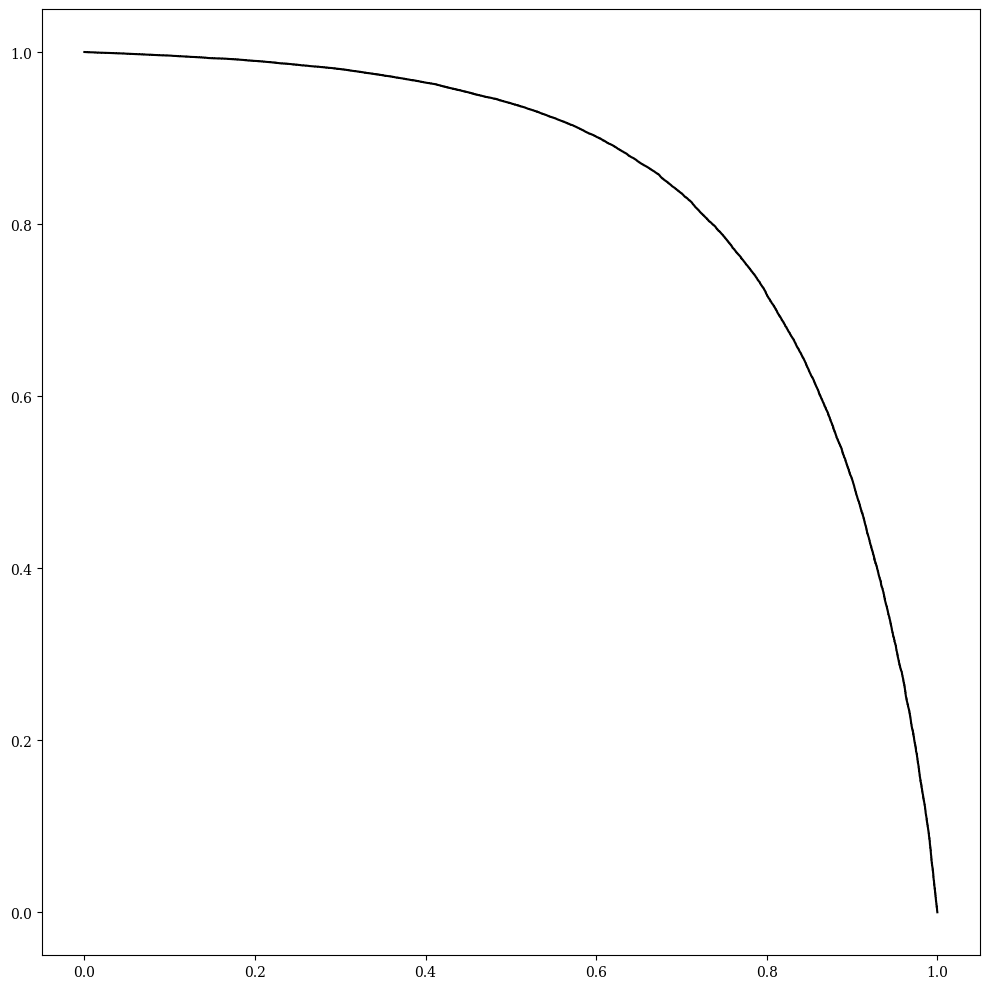

In [4]:
# EFN without spectral normalization
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_quarkGluon/EFN_zpT_hadlevel.keras")
del efn
gc.collect()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     240         ['input[0][0]']                  
                                                                                                  
 activation_77 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation_77[0][0]']          
                                                                                           

2320

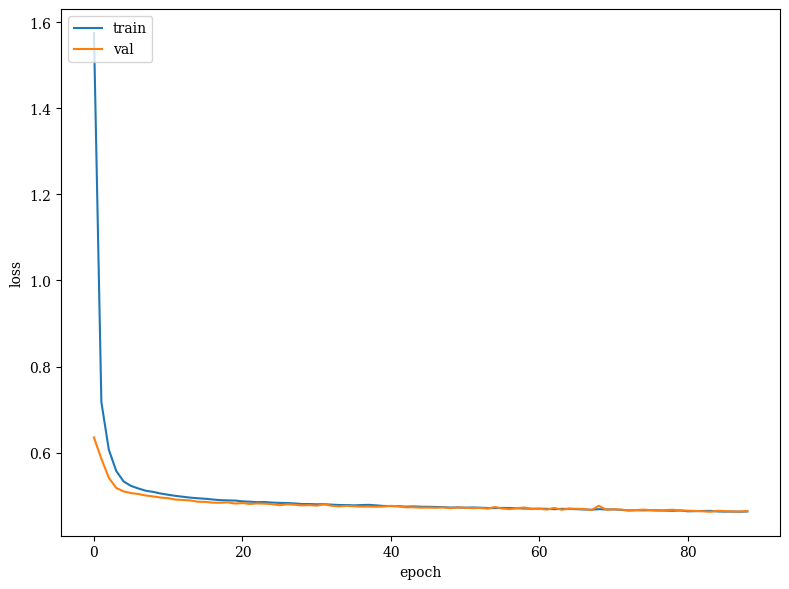

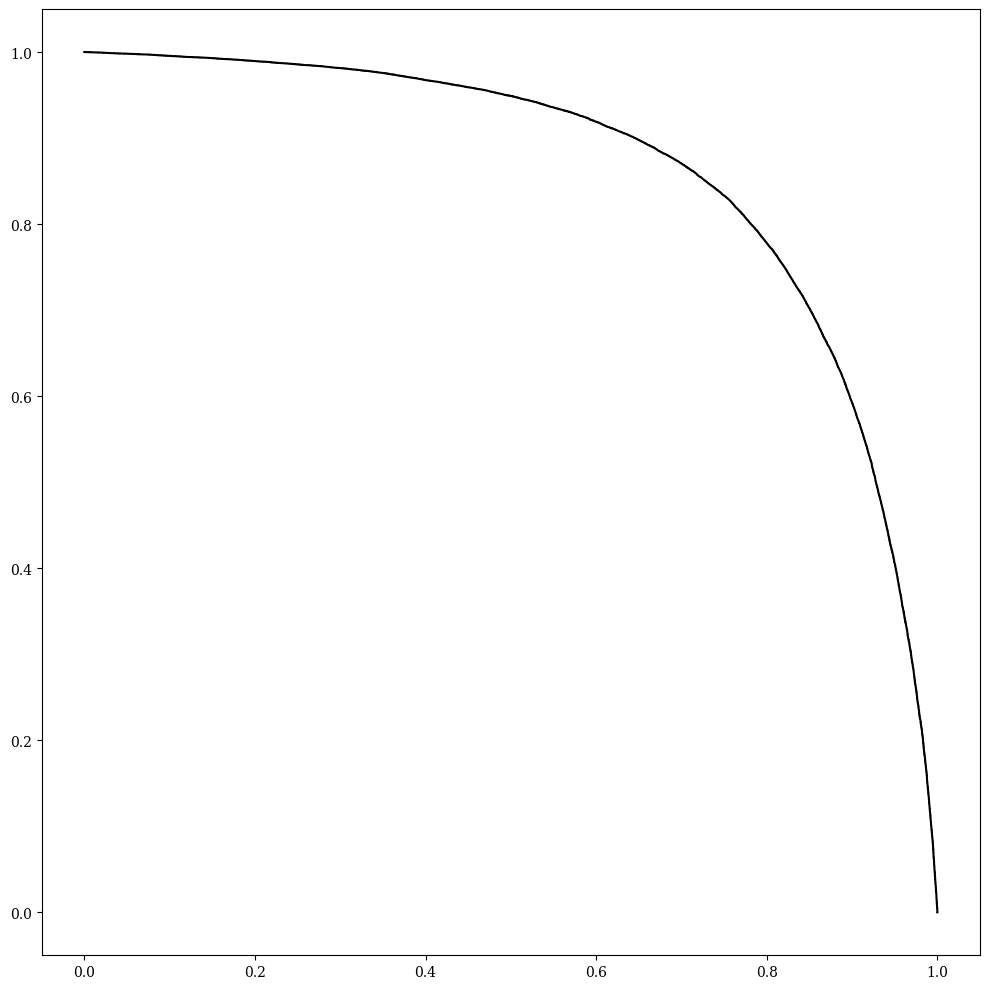

In [5]:
# PFN without spectral normalization
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":3,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_quarkGluon/PFN_zpT_hadlevel.keras")
del efn
gc.collect()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     481         ['input[0][0]']                  
                                                                                                  
 activation_84 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation_84[0][0]']          
                                                                                           

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 142ms/step - loss: 0.6725 - acc: 0.5051 - val_loss: 0.6577 - val_acc: 0.5397
Epoch 2/200
20/20 [==============================] - 3s 127ms/step - loss: 0.6466 - acc: 0.6011 - val_loss: 0.6312 - val_acc: 0.6882
Epoch 3/200
20/20 [==============================] - 2s 126ms/step - loss: 0.6199 - acc: 0.7041 - val_loss: 0.6017 - val_acc: 0.7246
Epoch 4/200
20/20 [==============================] - 3s 127ms/step - loss: 0.5908 - acc: 0.7234 - val_loss: 0.5711 - val_acc: 0.7336
Epoch 5/200
20/20 [==============================] - 2s 126ms/step - loss: 0.5665 - acc: 0.7300 - val_loss: 0.5511 - val_acc: 0.7417
Epoch 6/200
20/20 [==============================] - 2s 125ms/step - loss: 0.5532 - acc: 0.7339 - val_loss: 0.5410 - val_acc: 0.7463
Epoch 7/200
20/20 [==============================] - 2s 123ms/step - loss: 0.5442 - acc: 0.7397 - val_loss: 0.5341 - val_acc: 0.7488
Epoch 8/200
20/20 [==============================] - 2s 123ms/step - 

2573

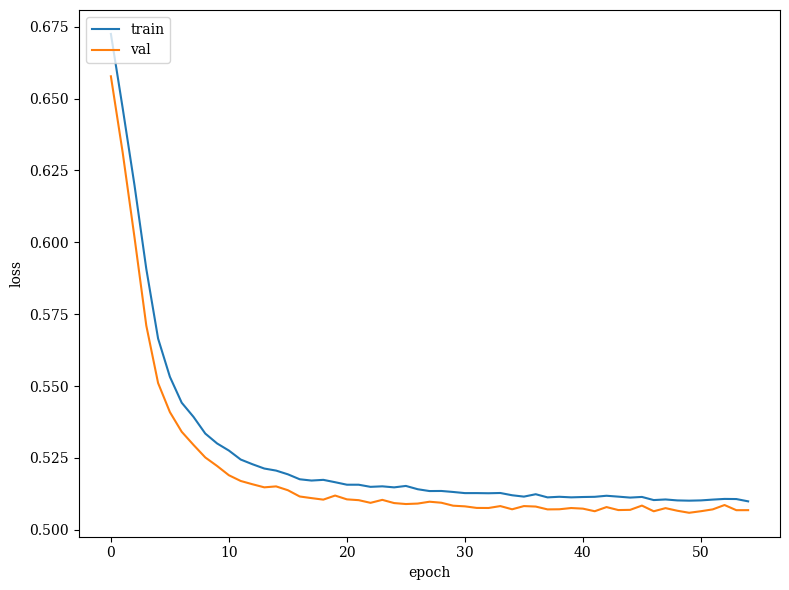

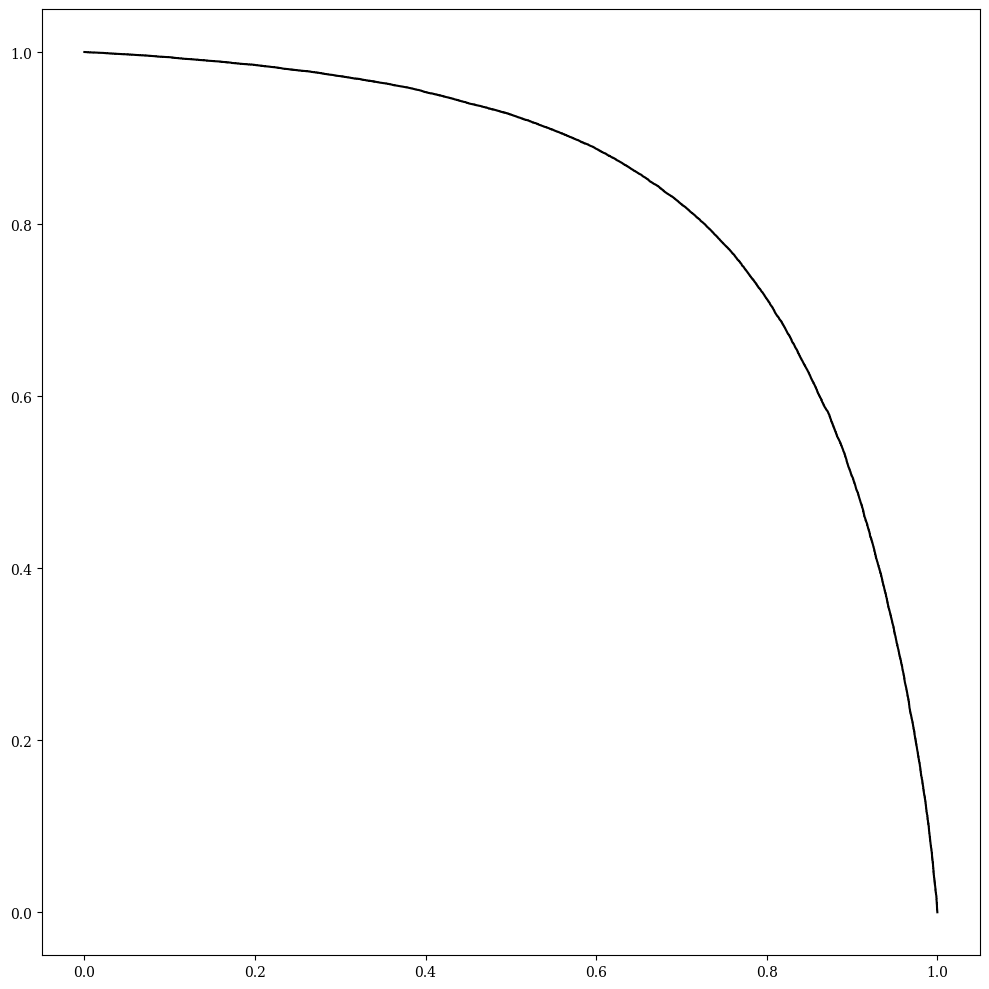

In [6]:
# PFN with spectral normalization
L = 1
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":3,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = True
model_kwargs['lip_const'] = float(L)
model_kwargs['eps_bjorck'] = None
model_kwargs['bound_only'] = True
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_quarkGluon/spectralPFN_L{L}_zpT_hadlevel.keras")
del efn
gc.collect()

# Parton Level

In [3]:
base="/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/"
nmax = 200000

hdata = get_data('q',hlevel=False,efrac=True,base=base,nmax=nmax,wta=True)
htrain, htest = train_test_split(hdata,train_size=0.5,random_state=rng1)
htest, hval = train_test_split(htest,train_size=0.5,random_state=rng2)

pdata = get_data('g',hlevel=False,efrac=True,base=base,nmax=nmax,wta=True)
ptrain, ptest = train_test_split(pdata,train_size=0.5,random_state=rng1)
ptest, pval = train_test_split(ptest,train_size=0.5,random_state=rng2)

train = np.concatenate((htrain,ptrain),axis=0)
train_labels = np.concatenate((np.ones((htrain.shape[0],1)),np.zeros((ptrain.shape[0],1))),axis=0)
perm = np.random.permutation(train.shape[0])
train = train[perm]
train_labels = train_labels[perm]

test = np.concatenate((htest,ptest),axis=0)
test_labels = np.concatenate((np.ones((htest.shape[0],1)),np.zeros((ptest.shape[0],1))),axis=0)
perm = np.random.permutation(test.shape[0])
test = test[perm]
test_labels = test_labels[perm]

val = np.concatenate((hval,pval),axis=0)
val_labels = np.concatenate((np.ones((hval.shape[0],1)),np.zeros((pval.shape[0],1))),axis=0)
perm = np.random.permutation(val.shape[0])
val = val[perm]
val_labels = val_labels[perm]

del hdata, pdata, htrain, htest, hval, ptrain, ptest, pval, perm

Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set4_R1.0_mH1000_pTall_WTA.h5
Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_

2024-01-04 22:53:44.530823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-04 22:53:44.563699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-04 22:53:44.564015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-04 22:53:44.564916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     361         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation[0][0]']             
                                                                                              

2024-01-04 22:53:46.409150: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 1/200
20/20 [==============================] - 5s 157ms/step - loss: 0.6928 - acc: 0.6121 - val_loss: 0.6921 - val_acc: 0.6522
Epoch 2/200
20/20 [==============================] - 3s 135ms/step - loss: 0.6917 - acc: 0.6475 - val_loss: 0.6911 - val_acc: 0.6459
Epoch 3/200
20/20 [==============================] - 3s 133ms/step - loss: 0.6908 - acc: 0.6460 - val_loss: 0.6901 - val_acc: 0.6460
Epoch 4/200
20/20 [==============================] - 3s 129ms/step - loss: 0.6898 - acc: 0.6429 - val_loss: 0.6892 - val_acc: 0.6421
Epoch 5/200
20/20 [==============================] - 3s 130ms/step - loss: 0.6890 - acc: 0.6425 - val_loss: 0.6884 - val_acc: 0.6408
Epoch 6/200
20/20 [==============================] - 3s 131ms/step - loss: 0.6882 - acc: 0.6386 - val_loss: 0.6877 - val_acc: 0.6382
Epoch 7/200
20/20 [==============================] - 3s 132ms/step - loss: 0.6876 - acc: 0.6357 - val_loss: 0.6870 - val_acc: 0.6366
Epoch 8/200
20/20 [==============================] - 3s 133ms/step - 

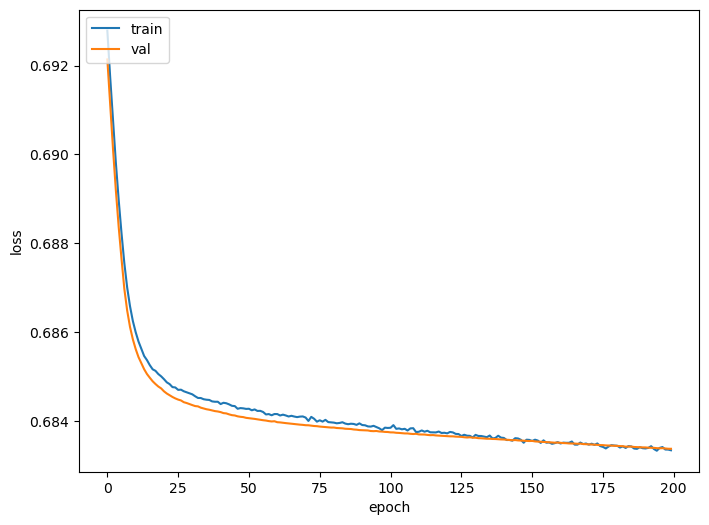

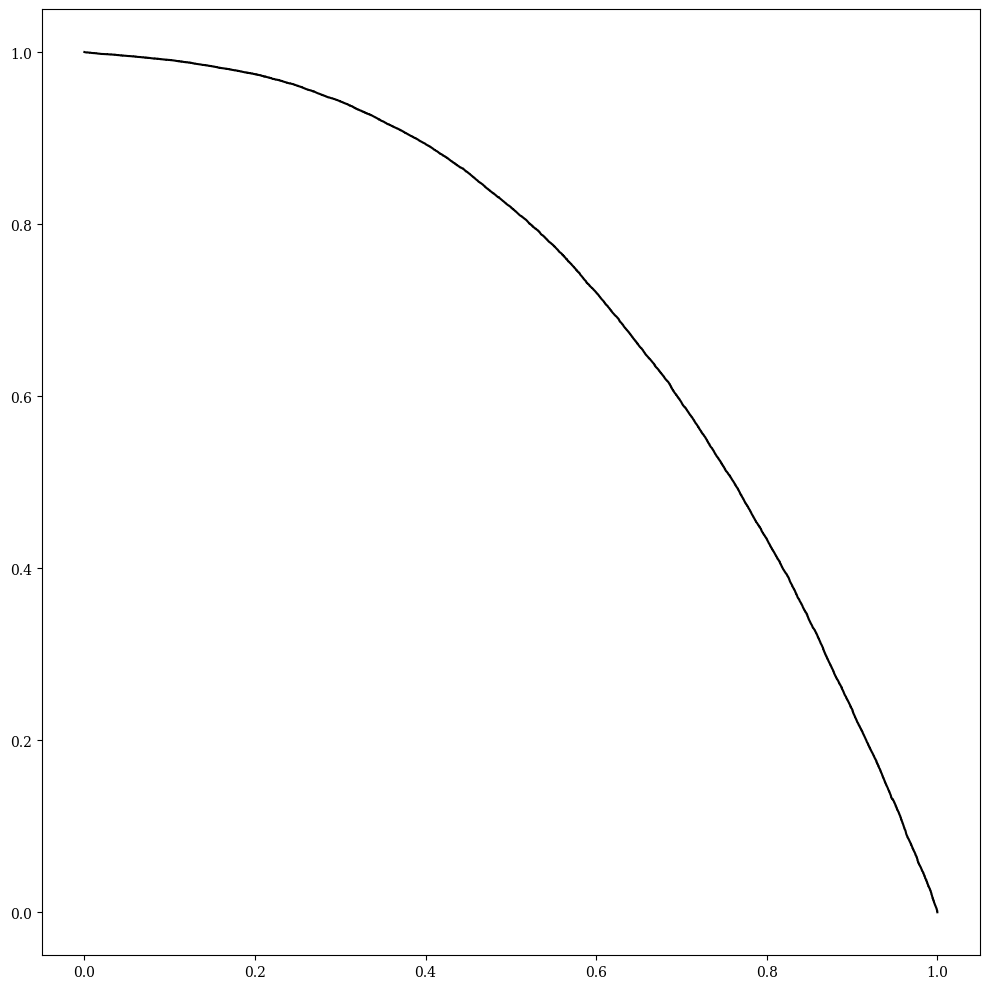

In [4]:
# EFN with spectral normalization
for i in range(1):
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":2,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-4),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
    efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    efn.save(f"keras_models_wta_quarkGluon/spectralEFN_zpT_partlevel_iter{i}.keras")
    del efn
    gc.collect()

2024-02-13 17:04:34.708972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 17:04:34.741416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 17:04:34.741743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 17:04:34.742722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    601         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    20201       ['activation[0][0]']             
                                                                                              

2024-02-13 17:04:37.111973: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 1/200
20/20 [==============================] - 4s 146ms/step - loss: 0.6930 - acc: 0.5345 - val_loss: 0.6927 - val_acc: 0.5360
Epoch 2/200
20/20 [==============================] - 2s 119ms/step - loss: 0.6908 - acc: 0.5958 - val_loss: 0.6879 - val_acc: 0.6056
Epoch 3/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6843 - acc: 0.6164 - val_loss: 0.6815 - val_acc: 0.6214
Epoch 4/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6803 - acc: 0.6287 - val_loss: 0.6789 - val_acc: 0.6329
Epoch 5/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6789 - acc: 0.6258 - val_loss: 0.6785 - val_acc: 0.6281
Epoch 6/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6785 - acc: 0.6283 - val_loss: 0.6784 - val_acc: 0.6091
Epoch 7/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6781 - acc: 0.6271 - val_loss: 0.6775 - val_acc: 0.6227
Epoch 8/200
20/20 [==============================] - 2s 118ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 141ms/step - loss: 0.6924 - acc: 0.5748 - val_loss: 0.6908 - val_acc: 0.6341
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6864 - acc: 0.6422 - val_loss: 0.6809 - val_acc: 0.6364
Epoch 3/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6772 - acc: 0.6347 - val_loss: 0.6745 - val_acc: 0.6287
Epoch 4/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6738 - acc: 0.6293 - val_loss: 0.6737 - val_acc: 0.6270
Epoch 5/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6728 - acc: 0.6301 - val_loss: 0.6726 - val_acc: 0.6186
Epoch 6/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6725 - acc: 0.6290 - val_loss: 0.6718 - val_acc: 0.6408
Epoch 7/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6719 - acc: 0.6305 - val_loss: 0.6714 - val_acc: 0.6271
Epoch 8/200
20/20 [==============================] - 2s 116ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 138ms/step - loss: 0.6916 - acc: 0.5758 - val_loss: 0.6879 - val_acc: 0.6239
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6801 - acc: 0.6361 - val_loss: 0.6712 - val_acc: 0.6384
Epoch 3/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6669 - acc: 0.6344 - val_loss: 0.6642 - val_acc: 0.6312
Epoch 4/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6640 - acc: 0.6307 - val_loss: 0.6629 - val_acc: 0.6334
Epoch 5/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6630 - acc: 0.6306 - val_loss: 0.6614 - val_acc: 0.6271
Epoch 6/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6624 - acc: 0.6311 - val_loss: 0.6614 - val_acc: 0.6327
Epoch 7/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6616 - acc: 0.6306 - val_loss: 0.6604 - val_acc: 0.6327
Epoch 8/200
20/20 [==============================] - 2s 114ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 138ms/step - loss: 0.6915 - acc: 0.5782 - val_loss: 0.6881 - val_acc: 0.6281
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6800 - acc: 0.6449 - val_loss: 0.6705 - val_acc: 0.6423
Epoch 3/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6654 - acc: 0.6384 - val_loss: 0.6625 - val_acc: 0.6322
Epoch 4/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6610 - acc: 0.6328 - val_loss: 0.6592 - val_acc: 0.6350
Epoch 5/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6589 - acc: 0.6322 - val_loss: 0.6574 - val_acc: 0.6406
Epoch 6/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6580 - acc: 0.6316 - val_loss: 0.6570 - val_acc: 0.6344
Epoch 7/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6577 - acc: 0.6304 - val_loss: 0.6578 - val_acc: 0.6240
Epoch 8/200
20/20 [==============================] - 2s 115ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 139ms/step - loss: 0.6914 - acc: 0.5745 - val_loss: 0.6881 - val_acc: 0.6627
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6797 - acc: 0.6612 - val_loss: 0.6699 - val_acc: 0.6610
Epoch 3/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6644 - acc: 0.6577 - val_loss: 0.6593 - val_acc: 0.6507
Epoch 4/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6578 - acc: 0.6415 - val_loss: 0.6556 - val_acc: 0.6407
Epoch 5/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6553 - acc: 0.6332 - val_loss: 0.6552 - val_acc: 0.6351
Epoch 6/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6549 - acc: 0.6331 - val_loss: 0.6532 - val_acc: 0.6374
Epoch 7/200
20/20 [==============================] - 2s 114ms/step - loss: 0.6541 - acc: 0.6326 - val_loss: 0.6532 - val_acc: 0.6359
Epoch 8/200
20/20 [==============================] - 2s 113ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 143ms/step - loss: 0.6912 - acc: 0.6082 - val_loss: 0.6871 - val_acc: 0.6445
Epoch 2/200
20/20 [==============================] - 2s 118ms/step - loss: 0.6770 - acc: 0.6528 - val_loss: 0.6650 - val_acc: 0.6512
Epoch 3/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6588 - acc: 0.6430 - val_loss: 0.6550 - val_acc: 0.6350
Epoch 4/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6542 - acc: 0.6340 - val_loss: 0.6523 - val_acc: 0.6352
Epoch 5/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6525 - acc: 0.6336 - val_loss: 0.6507 - val_acc: 0.6315
Epoch 6/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6521 - acc: 0.6330 - val_loss: 0.6510 - val_acc: 0.6323
Epoch 7/200
20/20 [==============================] - 2s 111ms/step - loss: 0.6511 - acc: 0.6339 - val_loss: 0.6502 - val_acc: 0.6368
Epoch 8/200
20/20 [==============================] - 2s 111ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 135ms/step - loss: 0.6911 - acc: 0.6033 - val_loss: 0.6862 - val_acc: 0.6546
Epoch 2/200
20/20 [==============================] - 2s 116ms/step - loss: 0.6751 - acc: 0.6581 - val_loss: 0.6626 - val_acc: 0.6549
Epoch 3/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6570 - acc: 0.6481 - val_loss: 0.6519 - val_acc: 0.6425
Epoch 4/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6515 - acc: 0.6367 - val_loss: 0.6493 - val_acc: 0.6353
Epoch 5/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6496 - acc: 0.6347 - val_loss: 0.6482 - val_acc: 0.6351
Epoch 6/200
20/20 [==============================] - 2s 112ms/step - loss: 0.6493 - acc: 0.6337 - val_loss: 0.6481 - val_acc: 0.6354
Epoch 7/200
20/20 [==============================] - 2s 111ms/step - loss: 0.6485 - acc: 0.6346 - val_loss: 0.6470 - val_acc: 0.6377
Epoch 8/200
20/20 [==============================] - 2s 113ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 138ms/step - loss: 0.6901 - acc: 0.6073 - val_loss: 0.6836 - val_acc: 0.6452
Epoch 2/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6701 - acc: 0.6571 - val_loss: 0.6570 - val_acc: 0.6544
Epoch 3/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6525 - acc: 0.6461 - val_loss: 0.6481 - val_acc: 0.6410
Epoch 4/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6477 - acc: 0.6378 - val_loss: 0.6464 - val_acc: 0.6362
Epoch 5/200
20/20 [==============================] - 2s 113ms/step - loss: 0.6470 - acc: 0.6357 - val_loss: 0.6456 - val_acc: 0.6402
Epoch 6/200
20/20 [==============================] - 2s 117ms/step - loss: 0.6461 - acc: 0.6364 - val_loss: 0.6448 - val_acc: 0.6395
Epoch 7/200
20/20 [==============================] - 2s 115ms/step - loss: 0.6458 - acc: 0.6355 - val_loss: 0.6447 - val_acc: 0.6437
Epoch 8/200
20/20 [==============================] - 2s 114ms/step - 

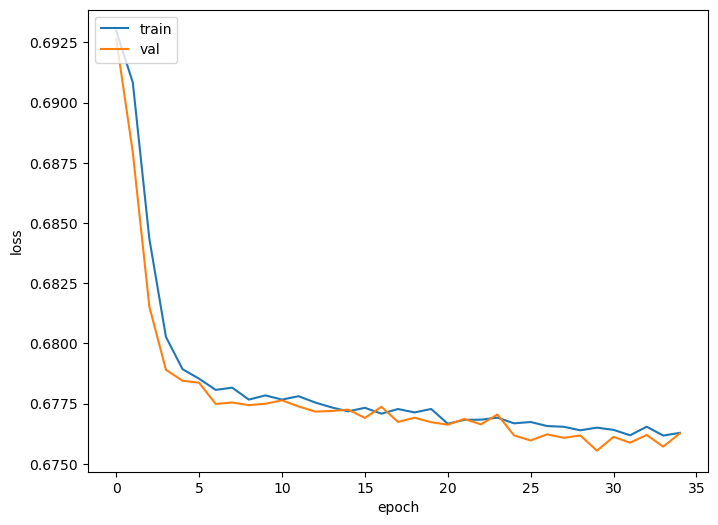

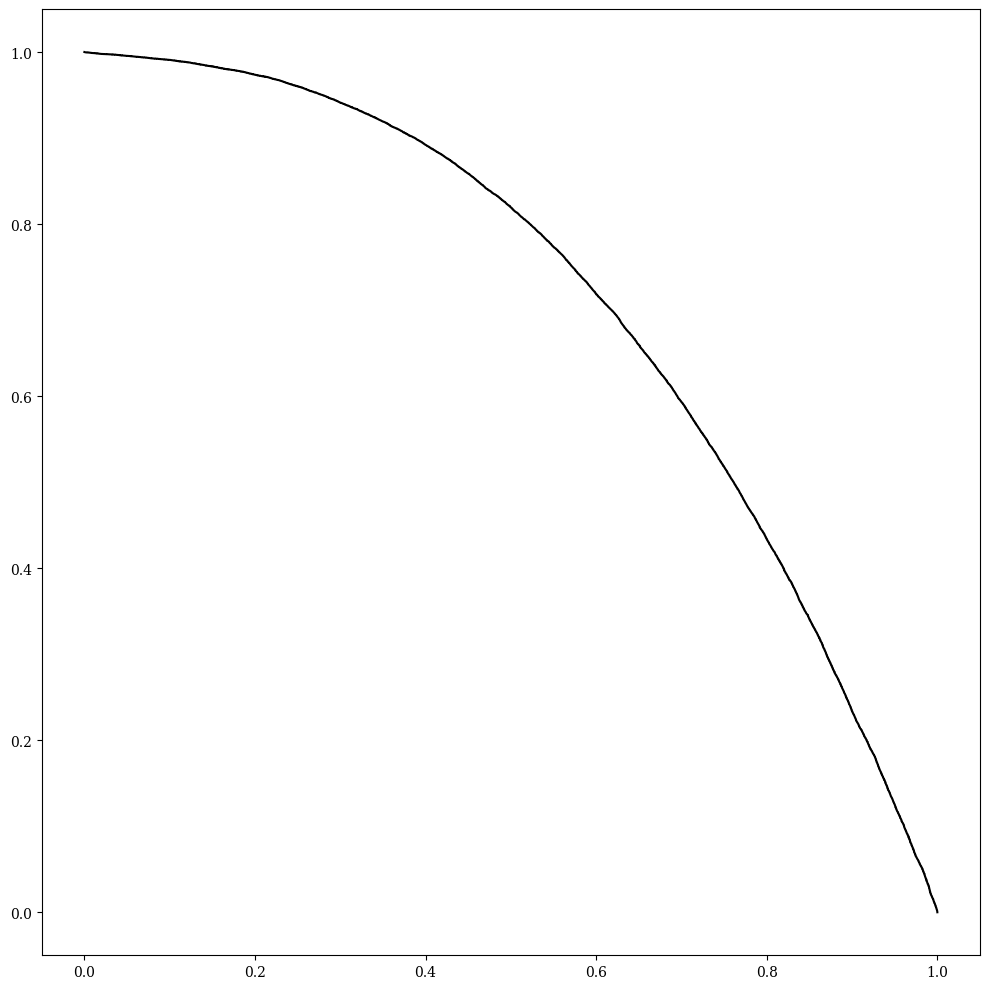

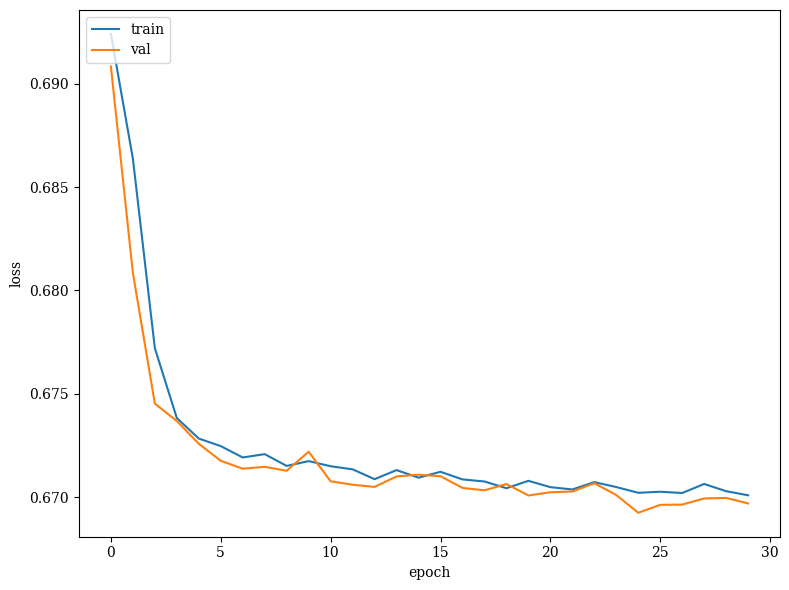

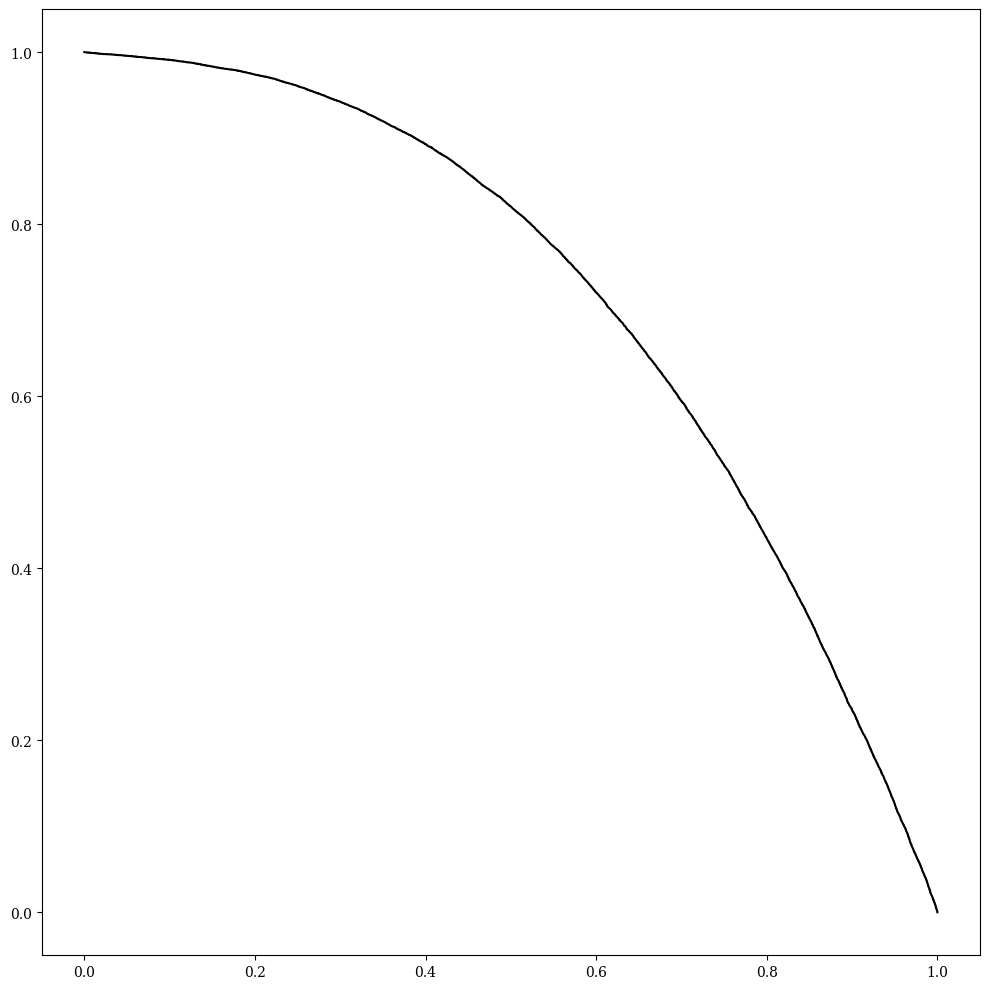

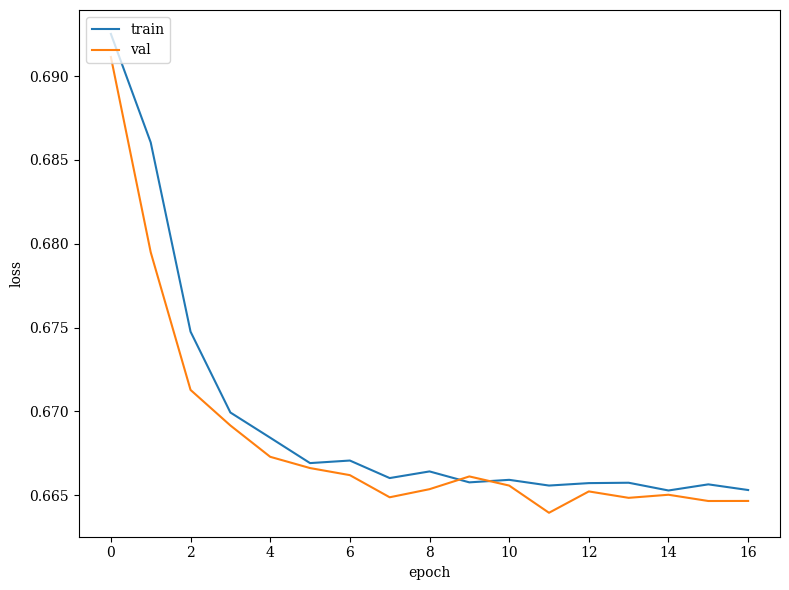

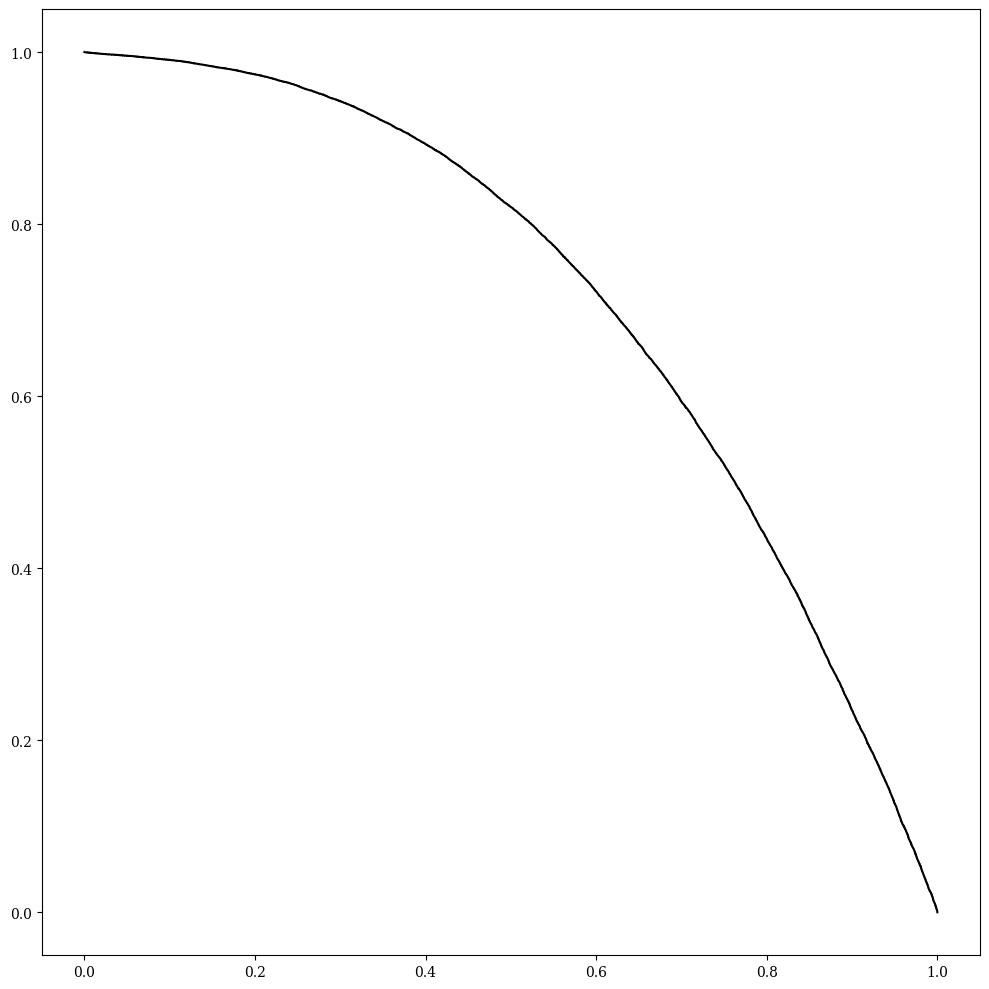

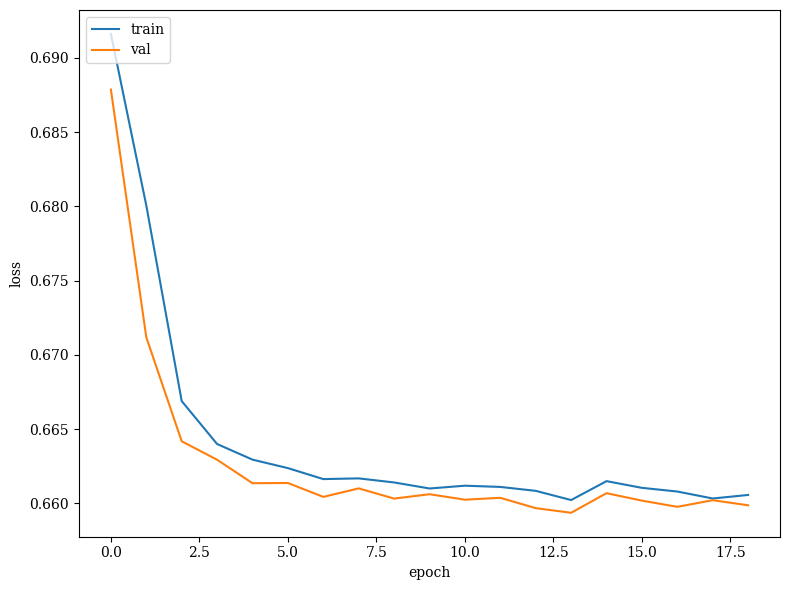

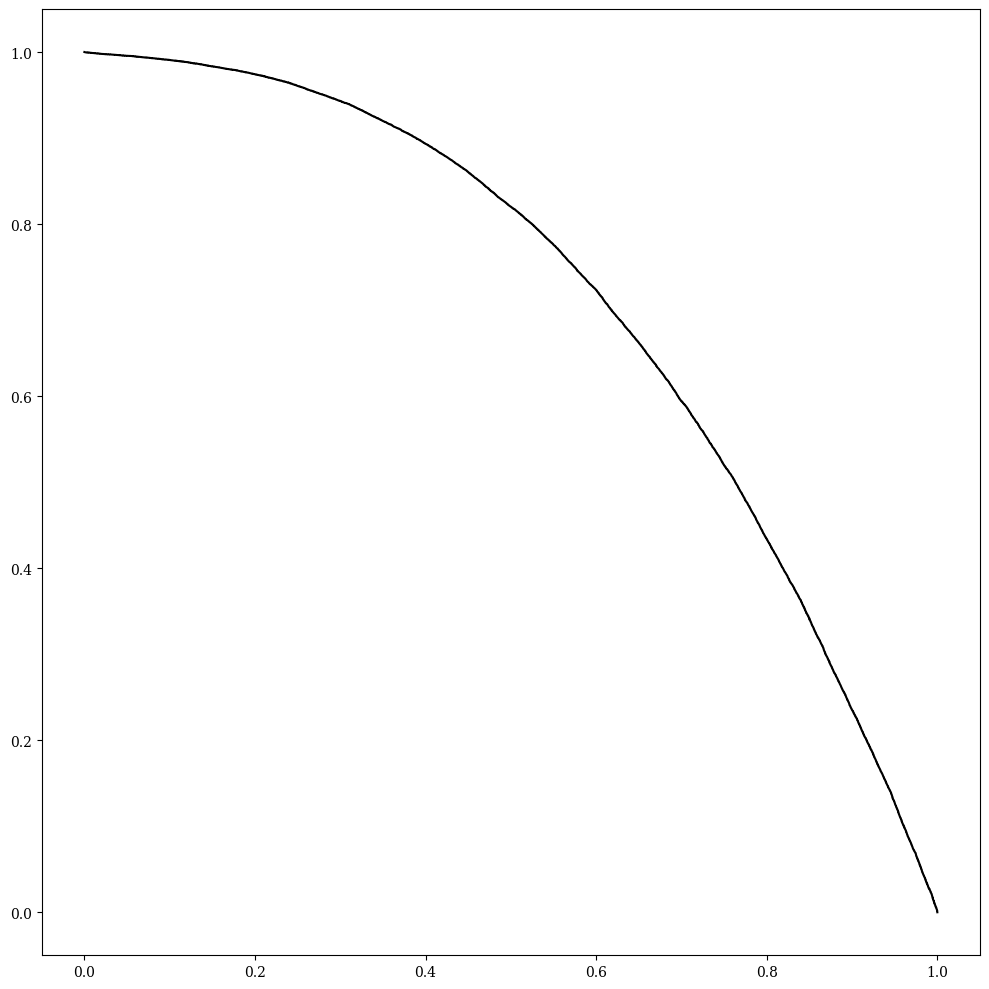

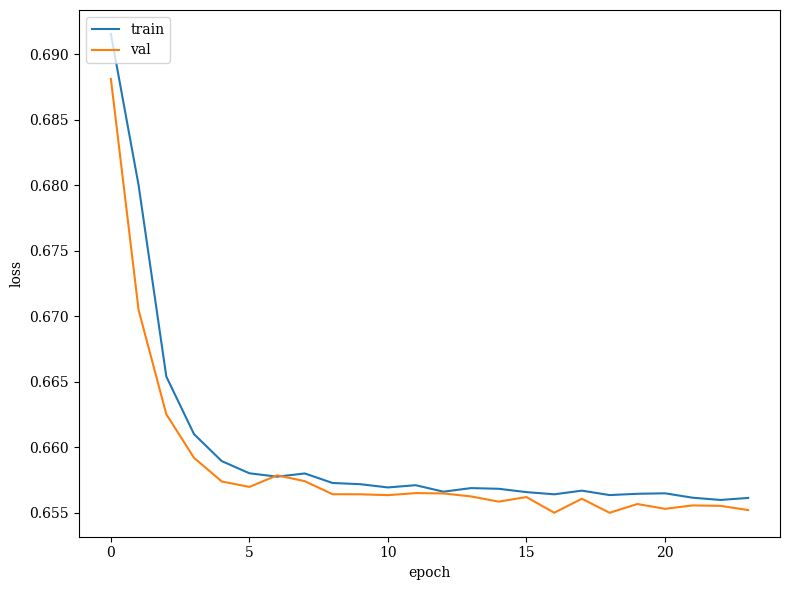

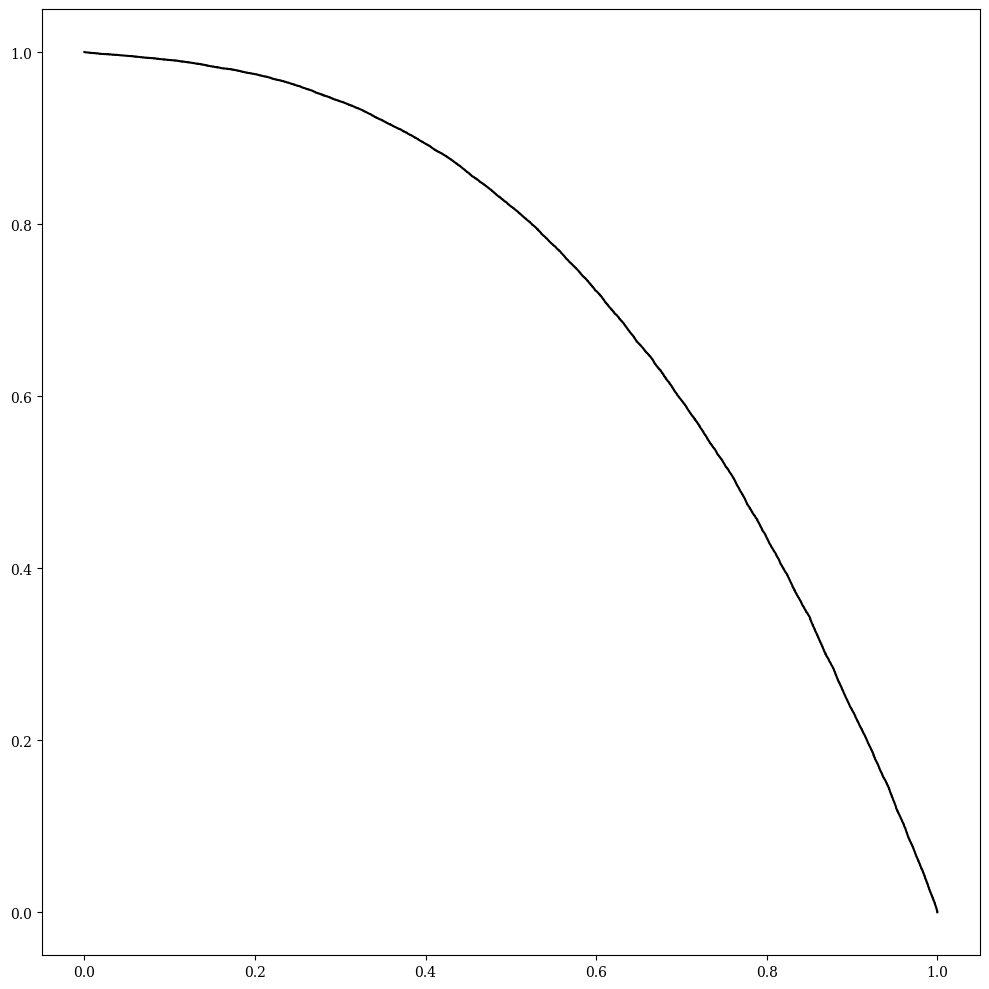

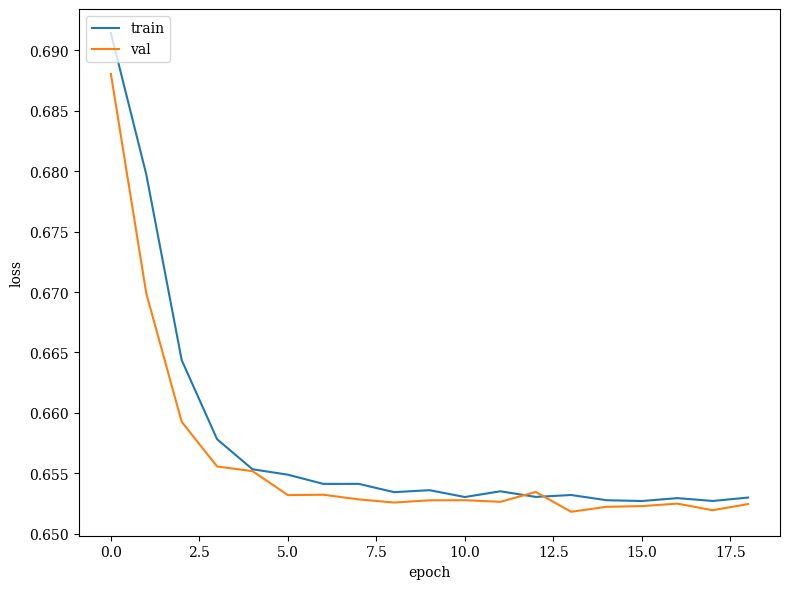

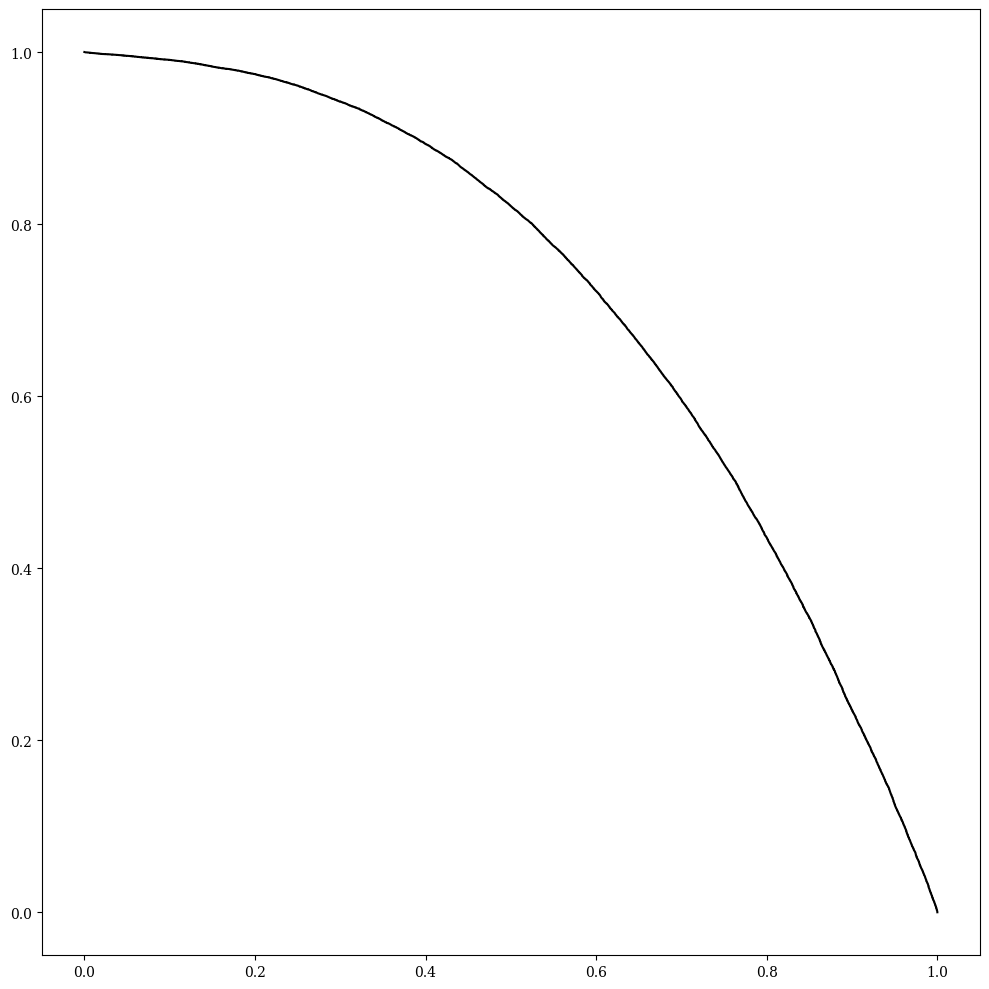

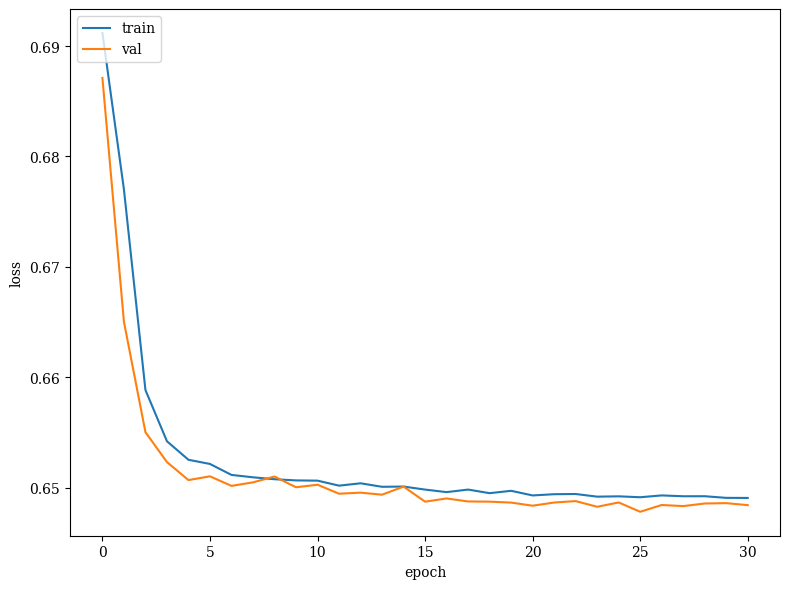

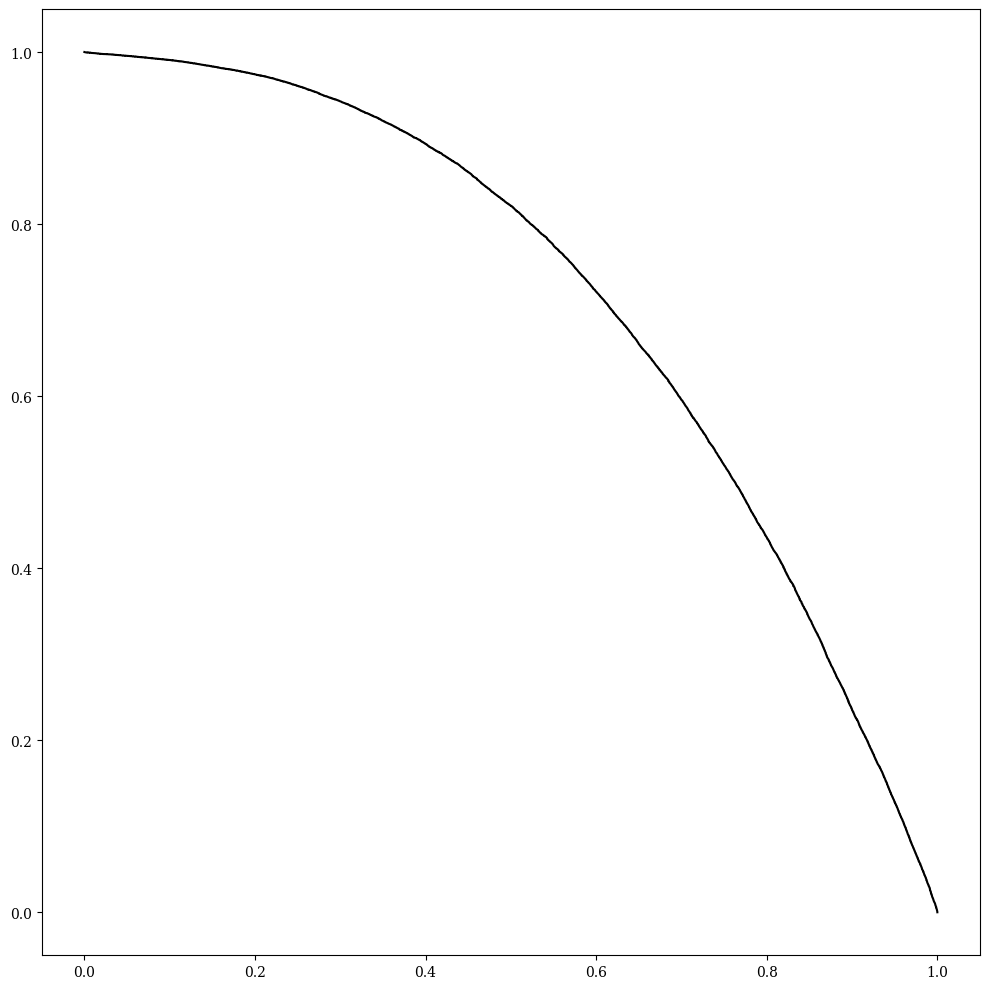

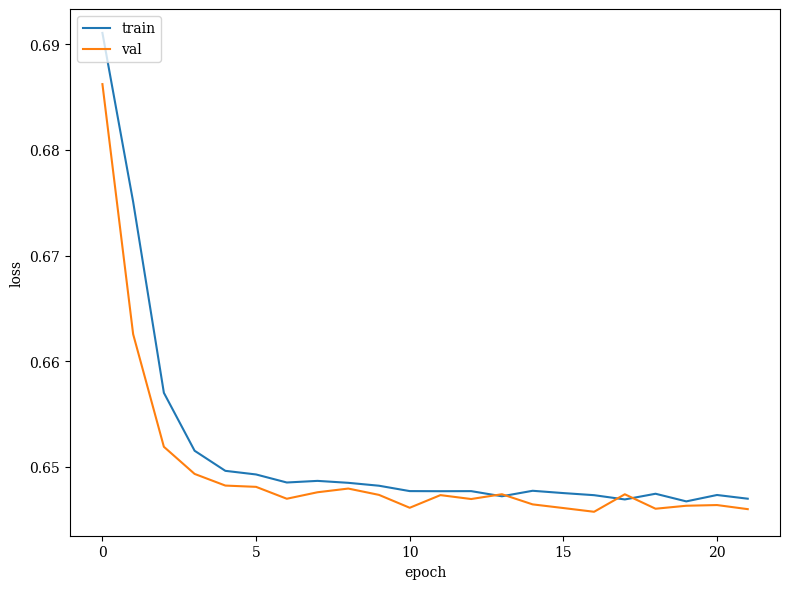

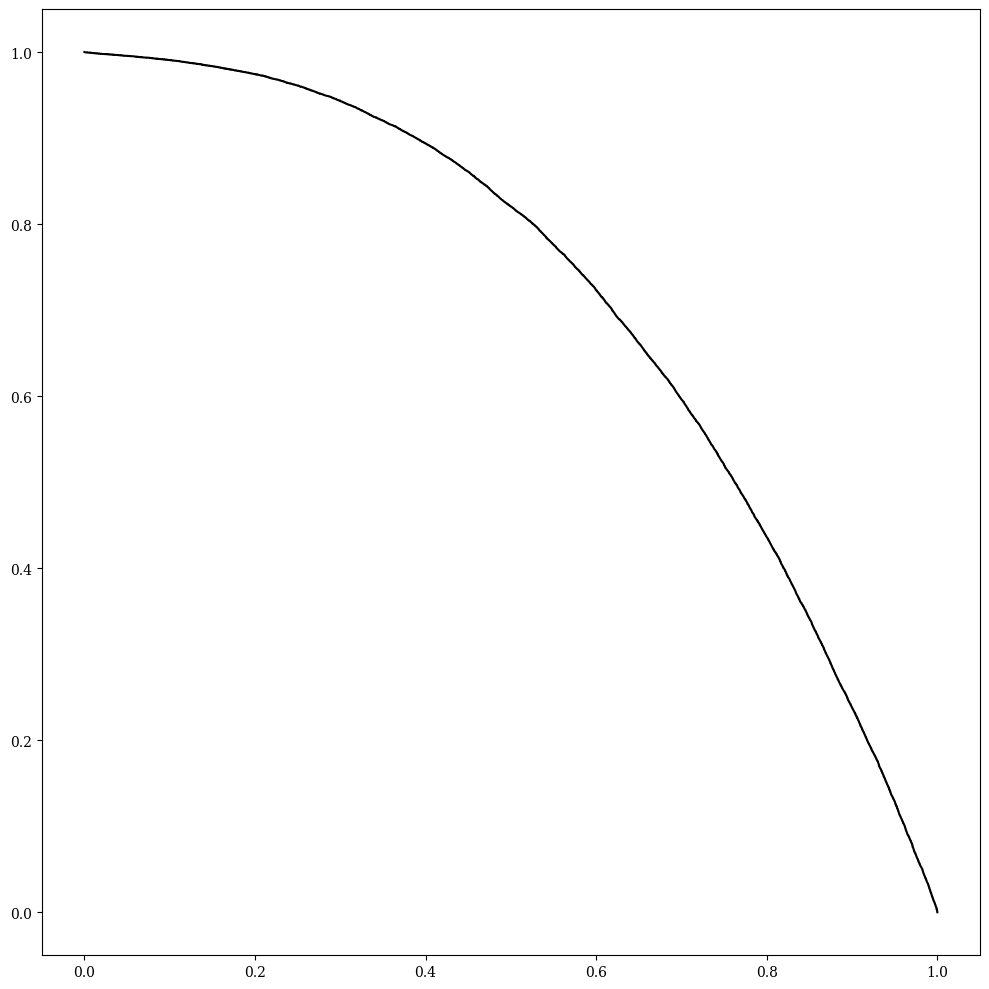

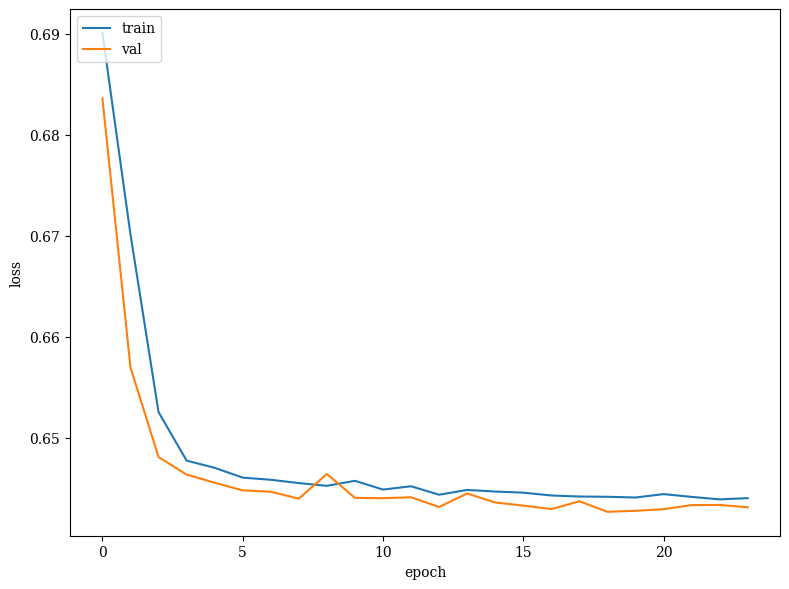

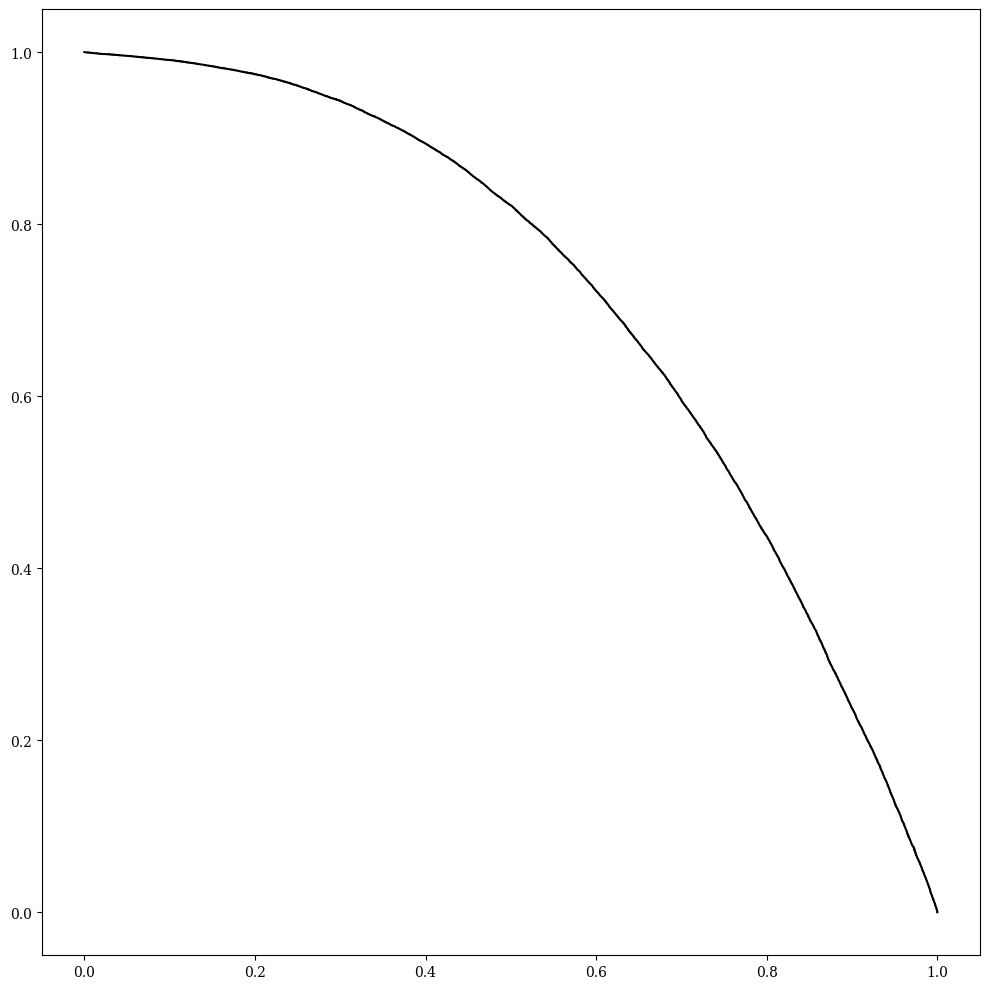

In [4]:
# spectral EFN L >= 1
#Ls = [20,30,40,50,60,70,80,90,
#      100,200,300,400,500,600,700,800,900,
#      1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
Ls = [2,3,4,5,6,7,8,9,10]
#for L in range(1,11,1):
for L in Ls:
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(100,100,128), "F_sizes":(100,100,100),
                    "F_acts":"relu","Phi_acts":"relu",
                    "F_dropouts":0.1,
                    "input_dim":2,
                    "output_dim":1,
                    "output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-3),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    model_kwargs['lip_const'] = float(L)
    model_kwargs['eps_bjorck'] = None
    model_kwargs['bound_only'] = True
    train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
    efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    efn.save(f"keras_models_wta_quarkGluon/spectralEFN_L{int(L)}_zpT_partlevel.keras")
    del efn
    gc.collect()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     180         ['phats_input[0][0]']            
                                                                                                  
 activation_70 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation_70[0][0]']          
                                                                                           

2381

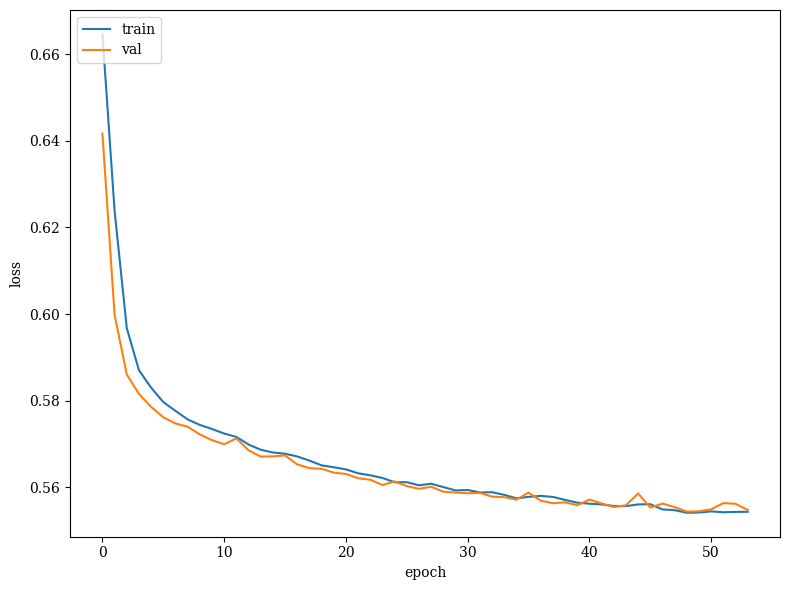

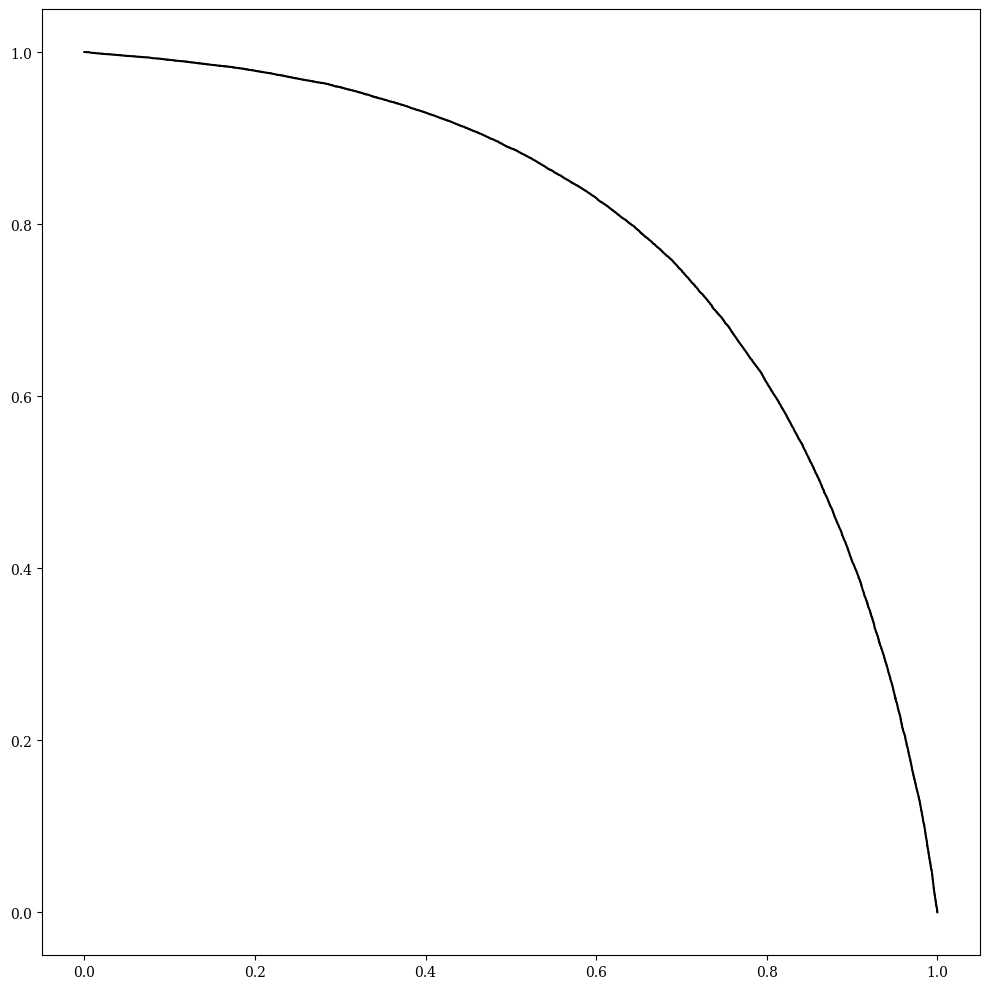

In [5]:
# EFN without spectral normalization
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_quarkGluon/EFN_zpT_partlevel.keras")
del efn
gc.collect()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     240         ['input[0][0]']                  
                                                                                                  
 activation_77 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation_77[0][0]']          
                                                                                           

2320

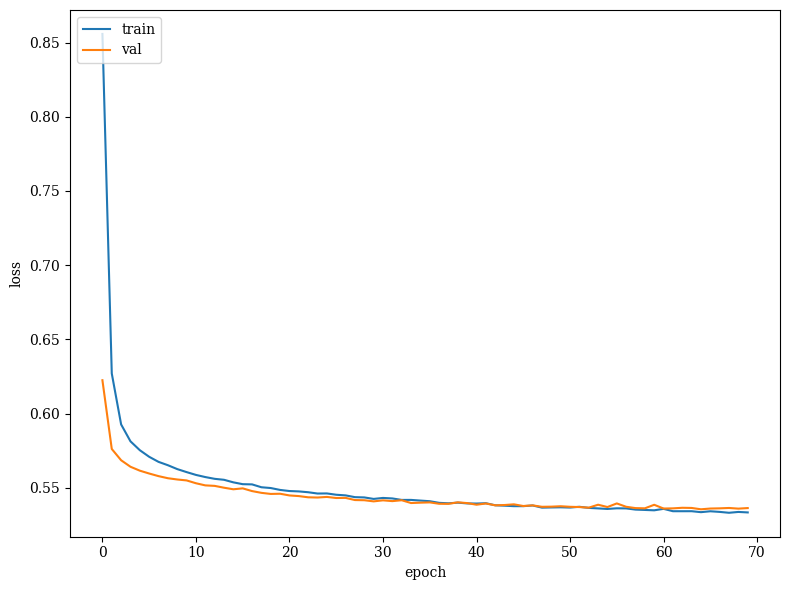

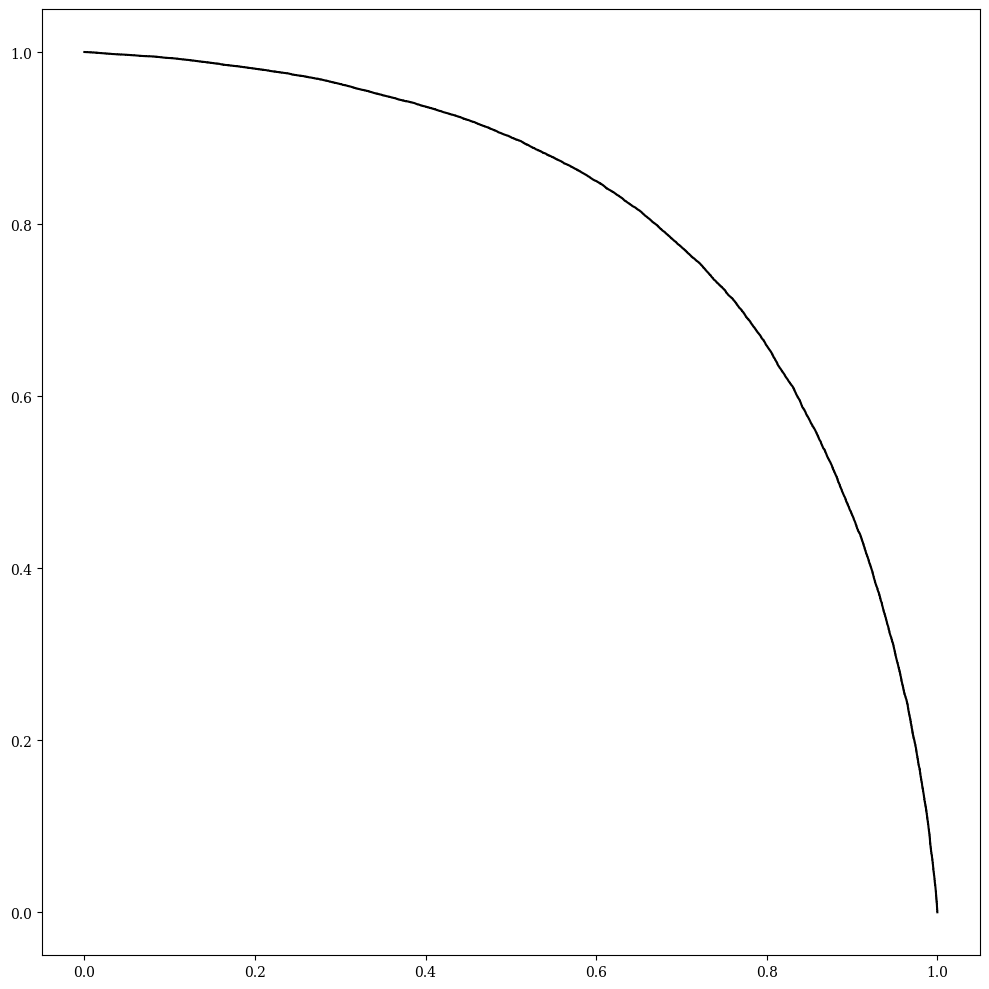

In [6]:
# PFN without spectral normalization
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":3,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_quarkGluon/PFN_zpT_partlevel.keras")
del efn
gc.collect()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, 3)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     481         ['input[0][0]']                  
                                                                                                  
 activation_84 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation_84[0][0]']          
                                                                                           

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
20/20 [==============================] - 4s 152ms/step - loss: 0.6848 - acc: 0.5378 - val_loss: 0.6666 - val_acc: 0.5331
Epoch 2/200
20/20 [==============================] - 3s 128ms/step - loss: 0.6526 - acc: 0.5960 - val_loss: 0.6369 - val_acc: 0.6848
Epoch 3/200
20/20 [==============================] - 3s 129ms/step - loss: 0.6259 - acc: 0.6846 - val_loss: 0.6113 - val_acc: 0.6950
Epoch 4/200
20/20 [==============================] - 3s 130ms/step - loss: 0.6050 - acc: 0.6957 - val_loss: 0.5922 - val_acc: 0.7004
Epoch 5/200
20/20 [==============================] - 3s 132ms/step - loss: 0.5935 - acc: 0.6958 - val_loss: 0.5850 - val_acc: 0.7008
Epoch 6/200
20/20 [==============================] - 3s 127ms/step - loss: 0.5866 - acc: 0.6984 - val_loss: 0.5808 - val_acc: 0.7012
Epoch 7/200
20/20 [==============================] - 3s 131ms/step - loss: 0.5824 - acc: 0.7005 - val_loss: 0.5784 - val_acc: 0.7014
Epoch 8/200
20/20 [==============================] - 3s 128ms/step - 

2573

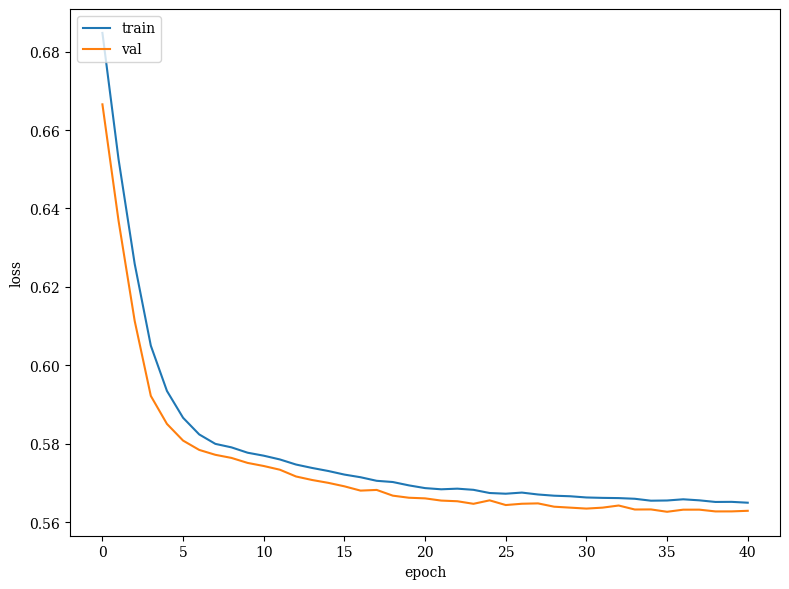

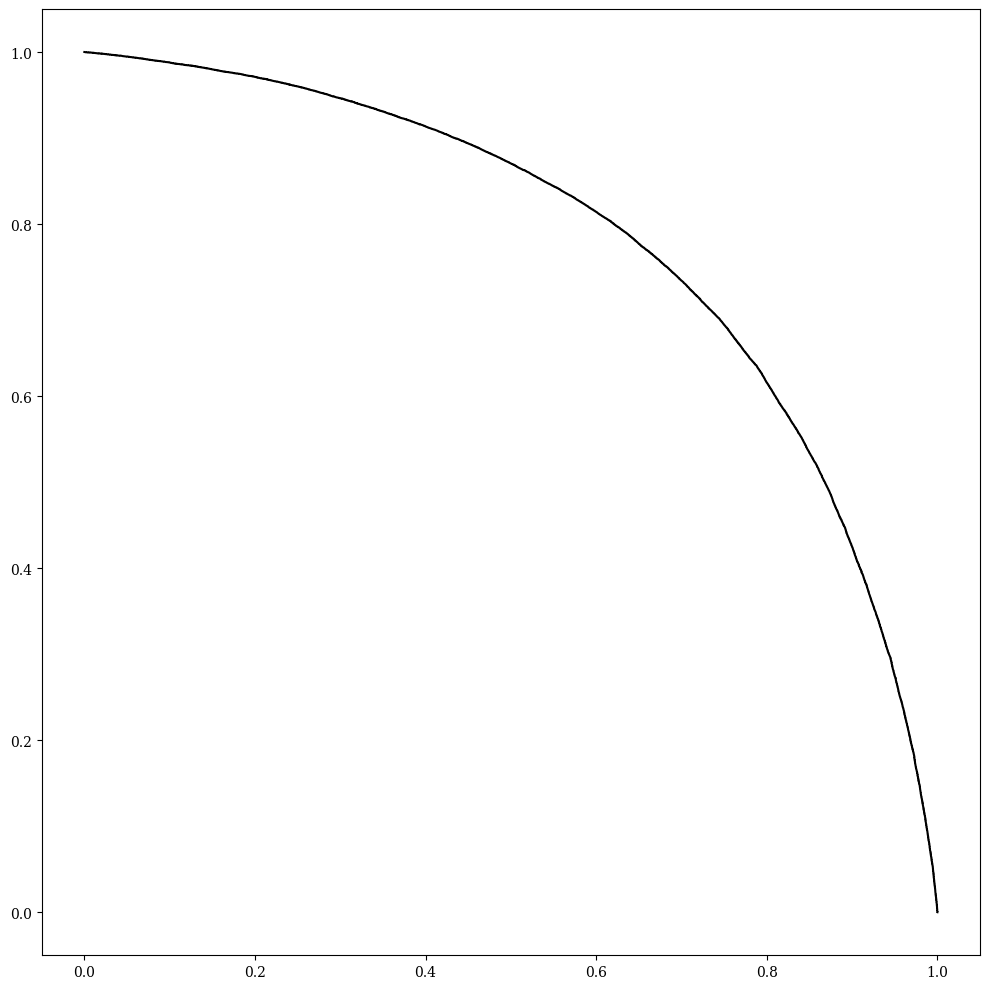

In [7]:
# PFN with spectral normalization
L = 1
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":3,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = True
model_kwargs['lip_const'] = float(L)
model_kwargs['eps_bjorck'] = None
model_kwargs['bound_only'] = True
train_kwargs = {"epochs":200,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_pfn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_quarkGluon/spectralPFN_L{L}_zpT_partlevel.keras")
del efn
gc.collect()

# Evaluation

In [2]:
import h5py
base = "/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable/"
with h5py.File(base+"h2qq_WTA_testSet_inputs_v2_pTinclusive_R1.0.h5","r") as f:
    zq = f['test'][:,:,:1]
    phat_q = f['test'][:,:,1:]
    label_q = f['labels'][()][:,0]

with h5py.File(base+"h2gg_WTA_testSet_inputs_v2_pTinclusive_R1.0.h5","r") as f:
    zg = f['test'][:,:,:1]
    phat_g = f['test'][:,:,1:]
    label_g = f['labels'][()][:,0]

zq_part = zq[label_q==0]
phat_q_part = phat_q[label_q==0]
zq_had = zq[label_q==1]
phat_q_had = phat_q[label_q==1]

zg_part = zg[label_g==0]
phat_g_part = phat_g[label_g==0]
zg_had = zg[label_g==1]
phat_g_had = phat_g[label_g==1]

z_part = np.concatenate((zq_part,zg_part),axis=0)
phat_part = np.concatenate((phat_q_part,phat_g_part),axis=0)
labels_part = np.concatenate((np.ones(zq_part.shape[0]),np.zeros(zg_part.shape[0])),axis=0)

z_had = np.concatenate((zq_had,zg_had),axis=0)
phat_had = np.concatenate((phat_q_had,phat_g_had),axis=0)
labels_had = np.concatenate((np.ones(zq_had.shape[0]),np.zeros(zg_had.shape[0])),axis=0)

def eval_model(modName,z,p,path="keras_models_wta_quarkGluon/",bs=1000):
    mod = keras.models.load_model(path+"/"+modName)
    if "PFN" in modName:
        preds = mod.predict(np.concatenate([z,p],axis=-1),batch_size=bs)[:,0]
    else:
        preds = mod.predict([z,p],batch_size=bs)[:,0]
    del mod
    return preds

In [3]:
base = "keras_models_wta_quarkGluon/"
Ls = [2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
models_hadlevel = ["EFN_zpT_hadlevel.keras","PFN_zpT_hadlevel.keras","spectralEFN_L1_zpT_hadlevel.keras","spectralPFN_L1_zpT_hadlevel.keras"]+ \
                  [f"spectralEFN_L{L}_zpT_hadlevel.keras" for L in Ls]
models_partlevel = ["EFN_zpT_partlevel.keras","PFN_zpT_partlevel.keras","spectralEFN_L1_zpT_partlevel.keras","spectralPFN_L1_zpT_partlevel.keras"]+ \
                   [f"spectralEFN_L{L}_zpT_partlevel.keras" for L in Ls]
modKeys = ["EFN","PFN","spectralEFN","spectralPFN"] + [f"spectralEFN_L{L}" for L in Ls]

# eval had-level models on had-level data
print("evaluating hadron-level models on hadron-level data")
np.save(f"{base}/evaluations/labels_had.npy",labels_had)
for i,mod in enumerate(models_hadlevel):
    preds = eval_model(mod,z_had,phat_had,path=base)
    np.save(f"{base}/evaluations/preds_hadData_hadModel_{modKeys[i]}.npy",preds)
    del preds

# eval part-level models on part-level data
print("evaluating parton-level models on parton-level data")
np.save(f"{base}/evaluations/labels_part.npy",labels_part)
for i,mod in enumerate(models_partlevel):
    preds = eval_model(mod,z_part,phat_part,path=base)
    np.save(f"{base}/evaluations/preds_partData_partModel_{modKeys[i]}.npy",preds)
    del preds

# eval part-level models on had-level data
print("evaluating parton-level models on hadron-level data")
for i,mod in enumerate(models_partlevel):
    preds = eval_model(mod,z_had,phat_had,path=base)
    np.save(f"{base}/evaluations/preds_hadData_partModel_{modKeys[i]}.npy",preds)
    del preds

evaluating hadron-level models on hadron-level data


2024-02-13 17:14:47.691027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 17:14:47.724101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 17:14:47.724435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-13 17:14:47.725597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

 55/100 [===============>..............] - ETA: 0s

2024-02-13 17:14:50.013015: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


100/100 [==============================] - 1s 5ms/step
evaluating parton-level models on parton-level data
100/100 [==============================] - 1s 4ms/step
evaluating parton-level models on hadron-level data
100/100 [==============================] - 1s 5ms/step
